# Data Anlysis

## Importing librairies

In [1]:
import pickle
import os 
import json
import string
import requests
from IPython.display import clear_output

In [4]:
!pip install langdetect
!pip install names-dataset
!pip install bertopic
!pip install Wikidata
!pip install wordcloud
!pip install pyLDAvis
!pip install NRCLex
!pip install scikit-posthocs
clear_output()

In [5]:
#EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
from datetime import datetime
from wikidata.client import Client
from tqdm import tqdm
from collections import Counter

#Preprocessing
from langdetect import detect
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import pos_tag
from nltk.corpus import wordnet
from nltk.corpus import stopwords
from names_dataset import NameDataset
from itertools import chain 
import seaborn as sns

#Stats
import scipy.stats as stats
from scipy.stats import kruskal
import scikit_posthocs as sp
from scipy.stats import linregress
import statsmodels.formula.api as smf
from scipy.stats import f_oneway

#LDA
from gensim.models import Phrases
from gensim import corpora
from gensim import models

#WordCloud 
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

#Topic visualization
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

#BERTopic
#from bertopic import BERTopic

#Targeted topics
from empath import Empath
import matplotlib.ticker as ticker

#Sentiment analysis
import vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [6]:
from tqdm import tqdm_notebook
from tqdm import tqdm
tqdm.pandas()
clear_output()

In [7]:
from nltk import download
download('averaged_perceptron_tagger')
download('wordnet')
download('omw-1.4')
download('punkt')
download('stopwords')
clear_output()

## References

[[1]](http://www.cs.cmu.edu/~ark/personas/) CMU Movie Summary Corpus webpage  
[[2]](http://www.cs.cmu.edu/~dbamman/pubs/pdf/bamman+oconnor+smith.acl13.pdf) _Learning Latent Personas of Film Characters_, David Bamman, Brendan O'Connor and Noah A. Smith, ACL 2013, Sofia, Bulgaria, August 2013 \
[[3]](https://www.nltk.org/) NLKT documentation 

# Table of contents
### [1. Extracted Topics](#1)

&nbsp;&nbsp;&nbsp;**[1.1 The topics](#1.1)**

&nbsp;&nbsp;&nbsp;**[1.2 Topics over time](#1.2)**

### [2. Targeted Topics ](#2)

&nbsp;&nbsp;&nbsp;**[2.1 Empath categories](#2.1)**

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[2.1.1 Categories creation and description](#2.1.1)\
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[2.1.2 Process tokens correctly for Empath analysis](#2.1.2)\
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[2.1.3 Empath analysis](#2.1.2)

&nbsp;&nbsp;&nbsp;**[2.2 Categories across movies](#2.2)**

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[2.2.1 Percentage of movies](#2.2.2)\
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[2.2.2 Categories distributions](#2.2.2)

&nbsp;&nbsp;&nbsp;**[2.3 Categories over time](#2.3)**

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[2.3.1 Every year](#2.3.1)\
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[2.3.1 Every five years](#2.3.2)

### [3. Sentiments](#3)

&nbsp;&nbsp;&nbsp;**[3.1 The sentiments](#3.1)**

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[3.1.1 Plot sentiment analysis](#3.1.1)\
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[3.1.2 Plot multi-sentiments](#3.1.2)

&nbsp;&nbsp;&nbsp;**[3.2 Sentiments over time](#3.2)**


### [4. Combined](#4)

&nbsp;&nbsp;&nbsp;**[4.1 Topics and sentiments](#4.1)**

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[4.1.1 Topics and sentiments association](#4.1.1)\
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[4.1.2 Topics and sentiments over time](#4.1.2)

&nbsp;&nbsp;&nbsp;**[4.2 Topics and concerns](#4.2)**

&nbsp;&nbsp;&nbsp;**[4.2 Sentiments and concerns](#4.3)**

### [5. Statistical analysis](#5)

&nbsp;&nbsp;&nbsp;**[5.1 Over time](#5.1)**

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[5.1.1 Topics over time](#5.1.1)\
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[5.1.2 Sentiments over time](#5.1.2)\
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[5.1.2.1 Compound](#5.1.2.1)\
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[5.1.2.2 All sentiments](#5.1.2.2)\
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[5.1.3 Concern categories over time](#5.1.3)\
&nbsp;&nbsp;&nbsp;**[5.2 Overall](#5.2)**

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[5.2.1 Sentiments](#5.2.1)\
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[5.2.1.1 During the whole period](#5.2.1.1)\
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[5.2.1.2 During t1](#5.2.1.2)\
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[5.2.1.3 During t2](#5.2.1.3)\
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[5.2.1.4 During t3](#5.2.1.4)\
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[5.2.2 Concern categories](#5.2.2)\
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[5.2.2.1 During the whole period](#5.2.2.1)\
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[5.2.2.2 During t1](#5.2.2.2)\
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[5.2.2.3 During t2](#5.2.2.3)\
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[5.2.2.4 During t3](#5.2.2.4)


&nbsp;&nbsp;&nbsp;**[5.3 Sentiments and topics](#5.3)**\
&nbsp;&nbsp;&nbsp;**[5.4 Sentiments and concerns](#5.4)**

## Context

All the preprocessing and data preparation have been done in `blabla.ipynb`. In this notebook, we will focus on the analysis of the information we obtained.

In [9]:
#Loading our complete dataset
movies = pd.read_pickle('data/movies_aug_BERT_SA_Concern.pkl')

In [10]:
movies.head()

WikiMovieID FreeMovieID                      Title ReleaseDate     Revenue  \
0       975900   /m/03vyhn             Ghosts of Mars  2001-08-24  14010832.0   
1      9363483  /m/0285_cd           White Of The Eye        1987         NaN   
2       261236   /m/01mrr1          A Woman in Flames        1983         NaN   
3     18998739  /m/04jcqvw  The Sorcerer's Apprentice        2002         NaN   
4      6631279   /m/0gffwj                Little city  1997-04-04         NaN   

   Runtime           Languages                   Countries  \
0     98.0  [English Language]  [United States of America]   
1    110.0  [English Language]            [United Kingdom]   
2    106.0   [German Language]                   [Germany]   
3     86.0  [English Language]              [South Africa]   
4     93.0  [English Language]  [United States of America]   

                                              Genres  \
0  [Thriller, Science Fiction, Horror, Adventure,...   
1  [Thriller, Erotic thriller, Psychological thri...   
2                                            [Drama]   
3    [Family Film, Fantasy, Adventure, World cinema]   
4  [Romantic comedy, Ensemble Film, Comedy-drama,...   

                                                Plot  ... ecological_concern  \
0  Set in the second half of the 22nd century, th...  ...                0.0   
1  A series of murders of rich young women throug...  ...                0.0   
2  Eva, an upper class housewife, becomes frustra...  ...                0.0   
3  Every hundred years, the evil Morgana  returns...  ...                0.0   
4  Adam, a San Francisco-based artist who works a...  ...                0.0   

  health_concern conflict_concern technological_concern space_concern  \
0            0.0         0.004484                   0.0      0.013453   
1            0.0         0.000000                   0.0      0.003257   
2            0.0         0.000000                   0.0      0.000000   
3            0.0         0.000000                   0.0      0.000000   
4            0.0         0.000000                   0.0      0.000000   

  gender_inequality_concern homophobia_concern racism_concern mental_concern  \
0                       0.0                0.0            0.0            0.0   
1                       0.0                0.0            0.0            0.0   
2                       0.0                0.0            0.0            0.0   
3                       0.0                0.0            0.0            0.0   
4                       0.0                0.0            0.0            0.0   

   relationships_concern  
0               0.004484  
1               0.003257  
2               0.000000  
3               0.000000  
4               0.030928  

[5 rows x 60 columns]

# 1. Extracted Topics <a id='1'></a>

## 1.1 The topics <a id='1.1'></a>

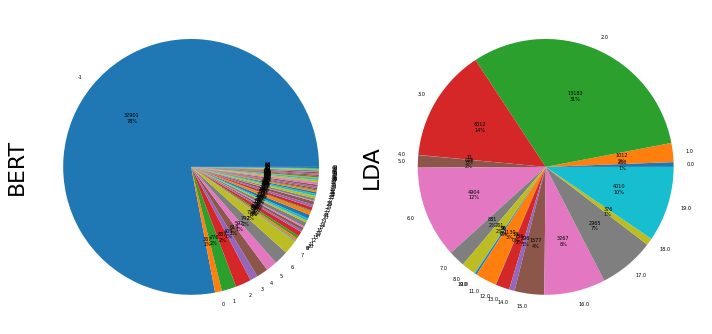

In [11]:
def label_function(val):
    return f'{val / 100 * len(movies):.0f}\n{val:.0f}%'

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))
movies.groupby('BERT').size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 5}, ax=ax1)
movies.groupby('Topic').size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 5}, ax=ax2)
ax1.set_ylabel('BERT', size=22)
ax2.set_ylabel('LDA', size=22)
plt.tight_layout()
plt.show()

In [14]:
#Creation of dataset for flourish plot
topic_words_dict = pd.read_pickle('data/words_per_topic.pkl')

topic_words = pd.DataFrame()
rep = movies.groupby(['BERT']).size()

for word in topic_words_dict:
    for nb in range(0,10):
        new_row = {'Words':topic_words_dict[word][nb][0], 'Word_score':topic_words_dict[word][nb][1], 'Topic':word, 'Topic_rep':rep[word]}
        topic_words = topic_words.append(new_row, ignore_index=True)

/var/folders/k_/c3cbvfzs61374h16mfb1dxb00000gn/T/ipykernel_30772/846688962.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  topic_words = topic_words.append(new_row, ignore_index=True)
/var/folders/k_/c3cbvfzs61374h16mfb1dxb00000gn/T/ipykernel_30772/846688962.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  topic_words = topic_words.append(new_row, ignore_index=True)
/var/folders/k_/c3cbvfzs61374h16mfb1dxb00000gn/T/ipykernel_30772/846688962.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  topic_words = topic_words.append(new_row, ignore_index=True)
/var/folders/k_/c3cbvfzs61374h16mfb1dxb00000gn/T/ipykernel_30772/846688962.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas

In [15]:
topic_words["Combined_rep"]=topic_words["Word_score"]*topic_words["Topic_rep"]
topic_words

Words  Word_score  Topic  Topic_rep  Combined_rep
0       father    0.011736      0        367      4.307105
1       police    0.010656      0        367      3.910847
2       family    0.009785      0        367      3.591162
3         raja    0.009695      0        367      3.558182
4        comes    0.008873      0        367      3.256487
..         ...         ...    ...        ...           ...
195      three    0.011765     19        207      2.435330
196   strasser    0.010974     19        207      2.271644
197  professor    0.009296     19        207      1.924313
198     cerina    0.009104     19        207      1.884510
199     stooge    0.008583     19        207      1.776654

[200 rows x 5 columns]

### 1.1.2 With BERT <a id='1.1.2'></a>

Labels for the top 10 most common topics.

In [16]:
#bert_topics = model.generate_topic_labels()

bert_topics = pd.read_pickle('predictions/bert_topics.pkl')
bert_topics = pd.DataFrame(bert_topics, columns = ["Bert_Topic"])
bert_topics.head(10)

Bert_Topic
0        -1_film_father_life
1     0_father_police_family
2  1_police_murder_detective
3           2_town_men_horse
4     3_mother_father_family
5       4_earth_planet_space
6      5_ship_island_captain
7         6_wong_kong_master
8        7_tokyo_conan_japan
9       8_tells_home_husband

Visualization of the data set with the BERT topics.

## 1.2 Topics over time<a id='1.2'></a>

In [17]:
movies["year"] = pd.to_datetime(movies.ReleaseDate, errors="coerce").dt.year
movies["five_year_period"] = movies.year//5*5

# A lot of the ReleaseDate are not filled in the initial dataset which leads to NaT (and eventually NaN) values when converting to datetime
movies_with_year = movies[~movies.year.isna()]
print("We could extract the year of the release date for {:.2f}% of the movies".format(len(movies_with_year)/len(movies)*100))

We could extract the year of the release date for 93.80% of the movies


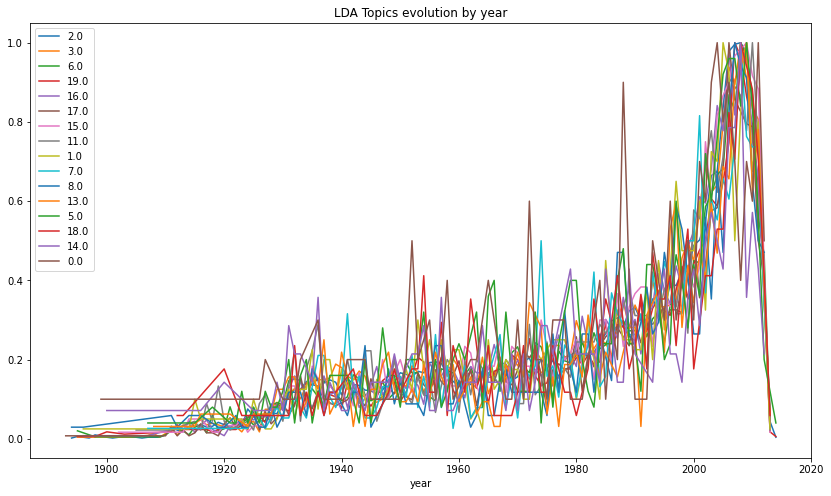

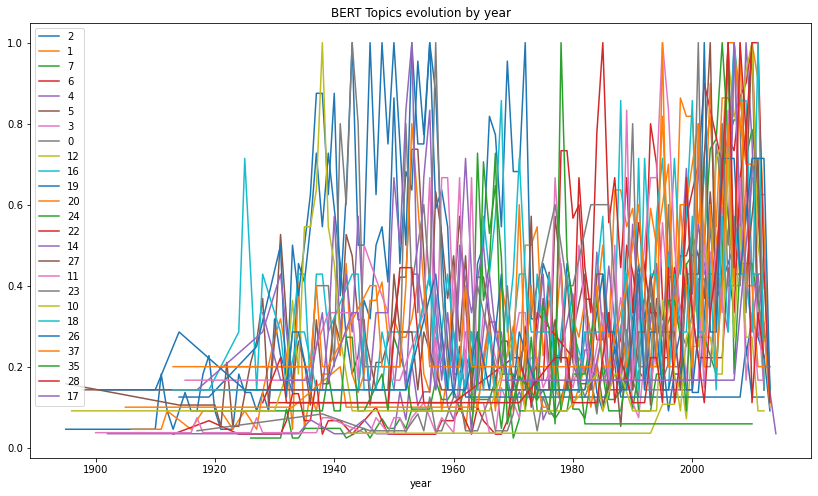

In [18]:
# Unique LDA topics with at least 100 movies assigned
topics_LDA = movies["Topic"].value_counts(dropna=True) 
topics_LDA = topics_LDA[topics_LDA>100].index.tolist()

fig = plt.figure(figsize=(14,8))
for topic in topics_LDA:
    temp = movies_with_year[movies_with_year.Topic==topic].groupby(["year"]).size()
    temp = temp/temp.max()   #should we divide by the movies_with_year.groupby(["year"]).size() ???
    fig = temp.plot(label=topic)
fig = plt.title("LDA Topics evolution by year")
fig = plt.legend()
fig = plt.show()

# Unique BERT topics with at least 100 movies assigned
topics_BERT = movies["BERT"].value_counts(dropna=False) 
topics_BERT = topics_BERT[topics_BERT>100].index.tolist()
## -1 goes to unclassfied movies
topics_BERT.remove(-1)

fig = plt.figure(figsize=(14,8))
for topic in topics_BERT:
    temp = movies_with_year[movies_with_year.BERT==topic].groupby(["year"]).size()
    temp = temp/temp.max()   
    fig = temp.plot(label=topic)
fig = plt.title("BERT Topics evolution by year")
fig = plt.legend()
fig = plt.show()

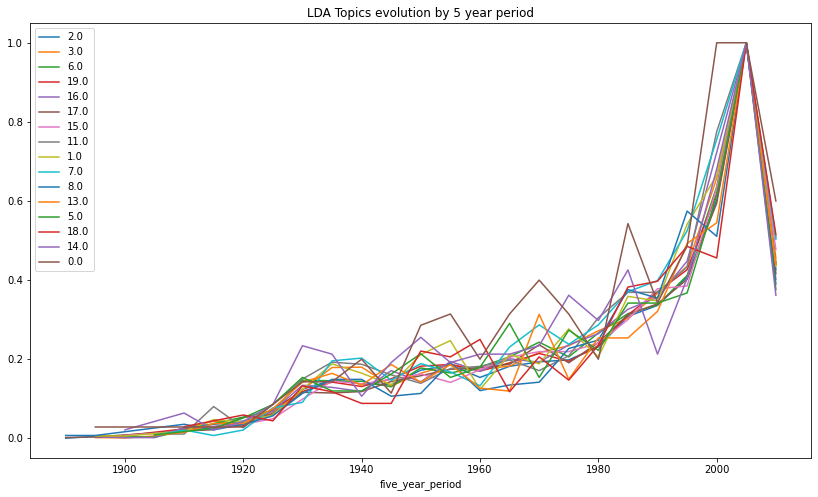

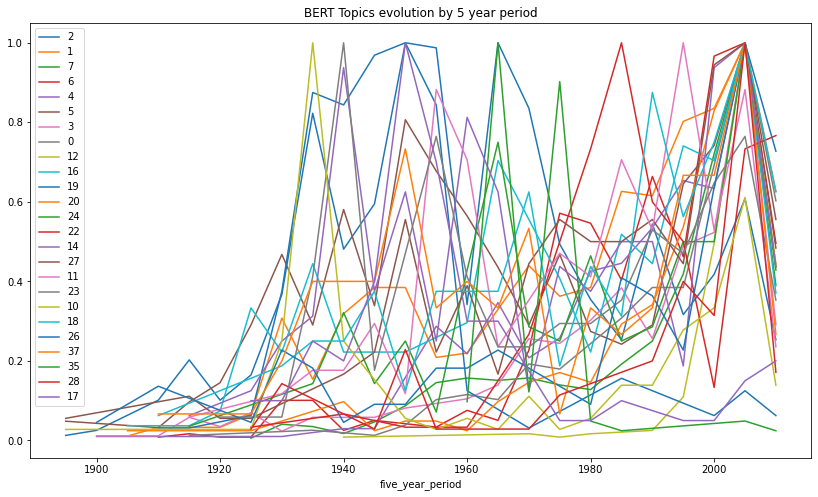

In [19]:
fig = plt.figure(figsize=(14,8))
for topic in topics_LDA:
    temp = movies_with_year[movies_with_year.Topic==topic].groupby(["five_year_period"]).size()
    temp = temp/temp.max()   
    fig = temp.plot(label=topic)
fig = plt.title("LDA Topics evolution by 5 year period")
fig = plt.legend()
fig = plt.show()

fig = plt.figure(figsize=(14,8)) 
for topic in topics_BERT:
    temp = movies_with_year[movies_with_year.BERT==topic].groupby(["five_year_period"]).size()
    temp = temp/temp.max()   
    fig = temp.plot(label=topic)
fig = plt.title("BERT Topics evolution by 5 year period")
fig = plt.legend()
fig = plt.show()

Last graph actually could be useful to draw some results. Now it doesn't show (so i'll have to make it show somehow) but if you plot just 1 topic (instead of all of them) you can see that for a few topics there was an interest eirther for a few decades and then it died out or the other way around. Depending on which topics these are (still a number i have to get real tags/names) it could be interesting. 

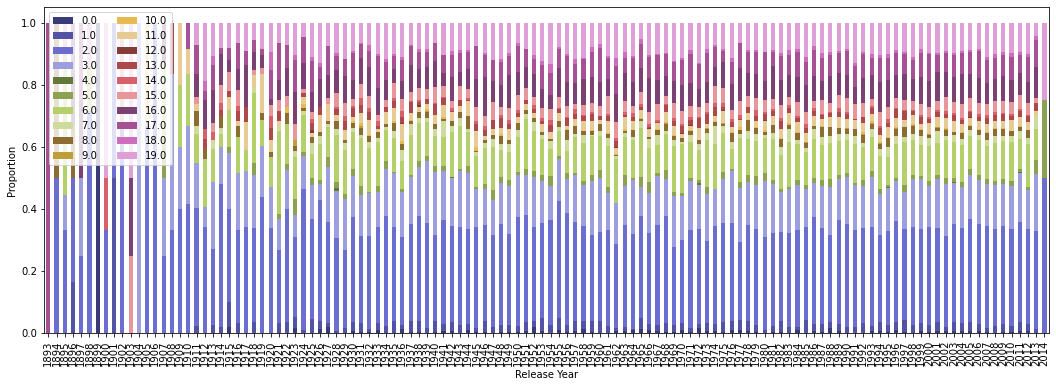

In [20]:
#Evolution over year LDA topics
cross_tab_prop = pd.crosstab(index=movies_with_year["year"].astype(int),
                             columns=movies_with_year["Topic"],
                             normalize="index")
cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab20b', 
                    figsize=(18, 6))

plt.legend(loc="upper left", ncol=2)
plt.xlabel("Release Year")
plt.ylabel("Proportion")
plt.show()

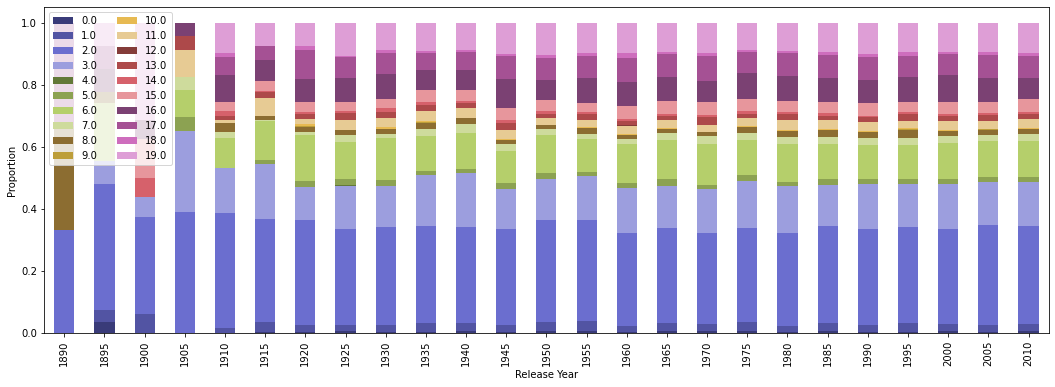

In [21]:
#Evolution over 5years LDA topics
cross_tab_prop = pd.crosstab(index=movies_with_year["five_year_period"].astype(int),
                             columns=movies_with_year["Topic"],
                             normalize="index")
cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab20b', 
                    figsize=(18, 6))

plt.legend(loc="upper left", ncol=2)
plt.xlabel("Release Year")
plt.ylabel("Proportion")
plt.show()

In [22]:
BERT_movies_with_year = movies_with_year[movies_with_year['BERT'].isin(topics_BERT)]
#Adding the names of the BERT topics into the data Frame (should we do it earlier)?
BERT_movies_with_year['BERT_names']=bert_topics.iloc[BERT_movies_with_year['BERT'].astype(int)+1].values
BERT_movies_with_year.head() #there is a warning but it does what I want (:

/var/folders/k_/c3cbvfzs61374h16mfb1dxb00000gn/T/ipykernel_30772/4111283085.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BERT_movies_with_year['BERT_names']=bert_topics.iloc[BERT_movies_with_year['BERT'].astype(int)+1].values


WikiMovieID FreeMovieID                                          Title  \
0        975900   /m/03vyhn                                 Ghosts of Mars   
10     21926710  /m/05p45cv                                  White on Rice   
21     25960460  /m/0b6kc_5                                 Daddy and Them   
36     16686643  /m/03ymtlq  One Small Step: The Story of the Space Chimps   
40     25413122  /m/04j1nd9                        Drums in the Deep South   

   ReleaseDate     Revenue  Runtime           Languages  \
0   2001-08-24  14010832.0     98.0  [English Language]   
10        2009         NaN     82.0                  []   
21        2001         NaN    101.0  [English Language]   
36        1995         NaN     60.0                  []   
40        1951         NaN     87.0  [English Language]   

                                  Countries  \
0                [United States of America]   
10               [United States of America]   
21  [United States of America, Netherlands]   
36               [United States of America]   
40               [United States of America]   

                                               Genres  \
0   [Thriller, Science Fiction, Horror, Adventure,...   
10     [Romantic comedy, Romance Film, Comedy, Indie]   
21                             [Black comedy, Comedy]   
36                                      [Documentary]   
40              [Action/Adventure, Western, War film]   

                                                 Plot  ...  \
0   Set in the second half of the 22nd century, th...  ...   
10  Jimmy ([[Hiroshi Watanabe  loves dinosaurs and...  ...   
21  Ruby and Claude Montgomery are a very insecure...  ...   
36  Told through archival photos and footage, spac...  ...   
40  Best friends Clay Clayburn and Will Denning gr...  ...   

   technological_concern space_concern gender_inequality_concern  \
0               0.000000      0.013453                       0.0   
10              0.000000      0.000000                       0.0   
21              0.000000      0.000000                       0.0   
36              0.009615      0.076923                       0.0   
40              0.000000      0.000000                       0.0   

   homophobia_concern racism_concern mental_concern relationships_concern  \
0                 0.0            0.0            0.0              0.004484   
10                0.0            0.0            0.0              0.033333   
21                0.0            0.0            0.0              0.107143   
36                0.0            0.0            0.0              0.000000   
40                0.0            0.0            0.0              0.000000   

      year five_year_period              BERT_names  
0   2001.0           2000.0    4_earth_planet_space  
10  2009.0           2005.0     7_tokyo_conan_japan  
21  2001.0           2000.0  3_mother_father_family  
36  1995.0           1995.0    4_earth_planet_space  
40  1951.0           1950.0        2_town_men_horse  

[5 rows x 63 columns]

In [23]:
colors=[[0.22352941, 0.23137255, 0.4745098,  1.        ],
        [0.32156863, 0.32941176, 0.63921569, 1.        ],
        [0.61176471, 0.61960784, 0.87058824, 1.        ],
        [0.38823529, 0.4745098,  0.22352941, 1.        ],
        [0.54901961, 0.63529412, 0.32156863, 1.        ],
        [0.80784314, 0.85882353, 0.61176471, 1.        ],
        [0.54901961, 0.42745098, 0.19215686, 1.        ],
        [0.74117647, 0.61960784, 0.22352941, 1.        ],
        [0.90588235, 0.79607843, 0.58039216, 1.        ],
        [0.51764706, 0.23529412, 0.22352941, 1.        ],
        [0.67843137, 0.28627451, 0.29019608, 1.        ],
        [0.90588235, 0.58823529, 0.61176471, 1.        ],
        [0.48235294, 0.25490196, 0.45098039, 1.        ],
        [0.64705882, 0.31764706, 0.58039216, 1.        ],
        [0.19215686, 0.50980392, 0.74117647, 1.        ],
        [0.41960784, 0.68235294, 0.83921569, 1.        ],
        [0.90196078, 0.33333333, 0.05098039, 1.        ],
        [0.99215686, 0.55294118, 0.23529412, 1.        ],
        [0.19215686, 0.63921569, 0.32941176, 1.        ],
        [0.45490196, 0.76862745, 0.4627451 , 1.        ],
        [0.45882353, 0.41960784, 0.69411765, 1.        ],
        [0.61960784, 0.60392157, 0.78431373, 1.        ],
        [0.38823529, 0.38823529, 0.38823529, 1.        ],
        [0.58823529, 0.58823529, 0.58823529, 1.        ]]

colors_tab20b =  plt.cm.get_cmap('tab20b')
#print(colors_tab20b([0,1,3,4,5,7,8,9,11,12,13,15,16,17]))
colors_tab20c =  plt.cm.get_cmap('tab20c')
#print(colors_tab20c([0,1,4,5,8,9,12,13,16,17]))
#colors = np.vstack((colors_tab20b,colors_tab20c))
#print(colors)
mymap = mcolors.LinearSegmentedColormap.from_list('my_colormap', colors)

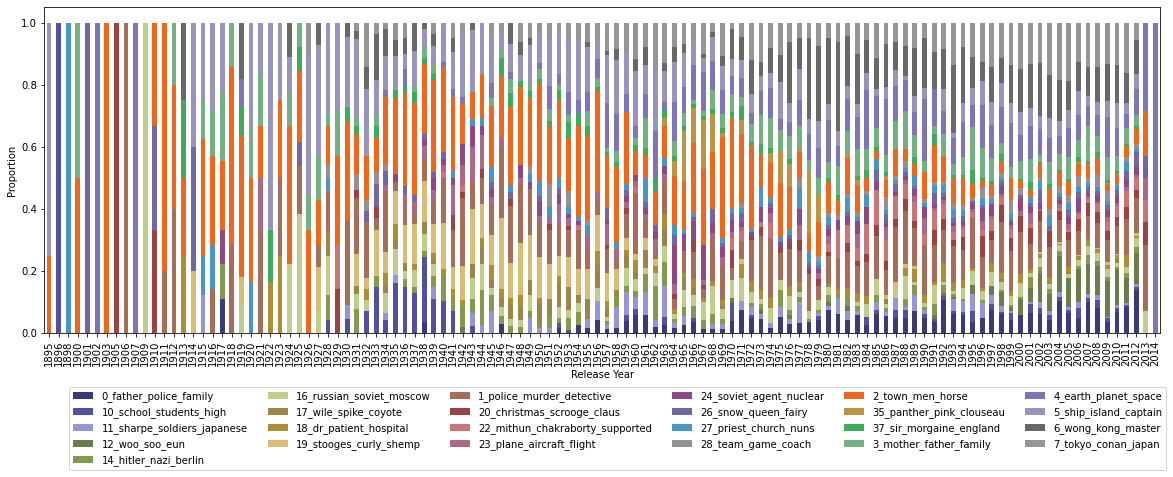

In [24]:
#Evolution over year BERT topics

cross_tab_prop = pd.crosstab(index=BERT_movies_with_year["year"].astype(int),
                             columns=BERT_movies_with_year["BERT_names"],
                             normalize="index")
cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    colormap=mymap, 
                    figsize=(20, 6))

plt.legend(ncol=6,bbox_to_anchor=(1.01, -0.15))
plt.xlabel("Release Year")
plt.ylabel("Proportion")
plt.show()

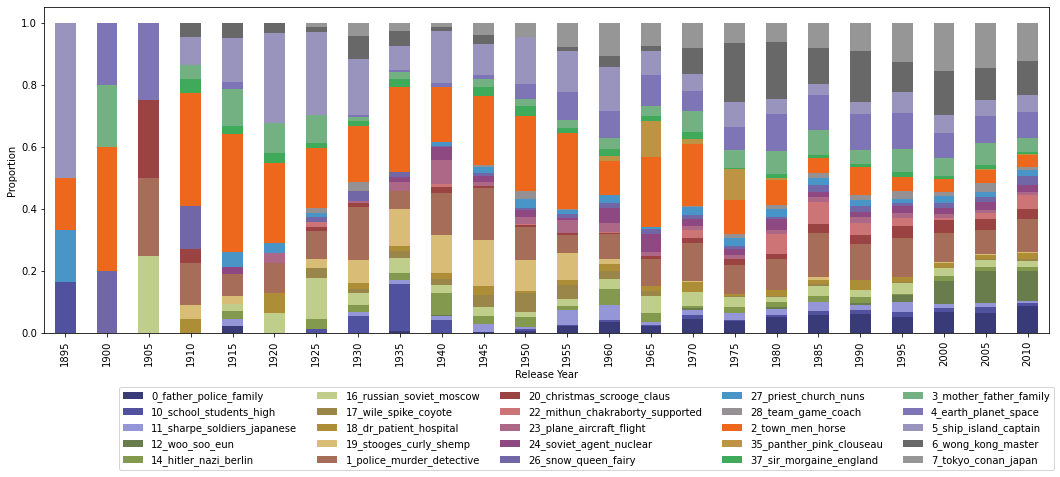

In [25]:
#evolution over 5yers BERT topics
cross_tab_prop = pd.crosstab(index=BERT_movies_with_year["five_year_period"].astype(int),
                             columns=BERT_movies_with_year["BERT_names"],
                             normalize="index")
cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    colormap=mymap, 
                    figsize=(18, 6))

plt.legend(ncol=5,bbox_to_anchor=(1.01, -0.15)) #ncol=1,bbox_to_anchor=(1.01, 1.0))
plt.xlabel("Release Year")
plt.ylabel("Proportion")
plt.show()

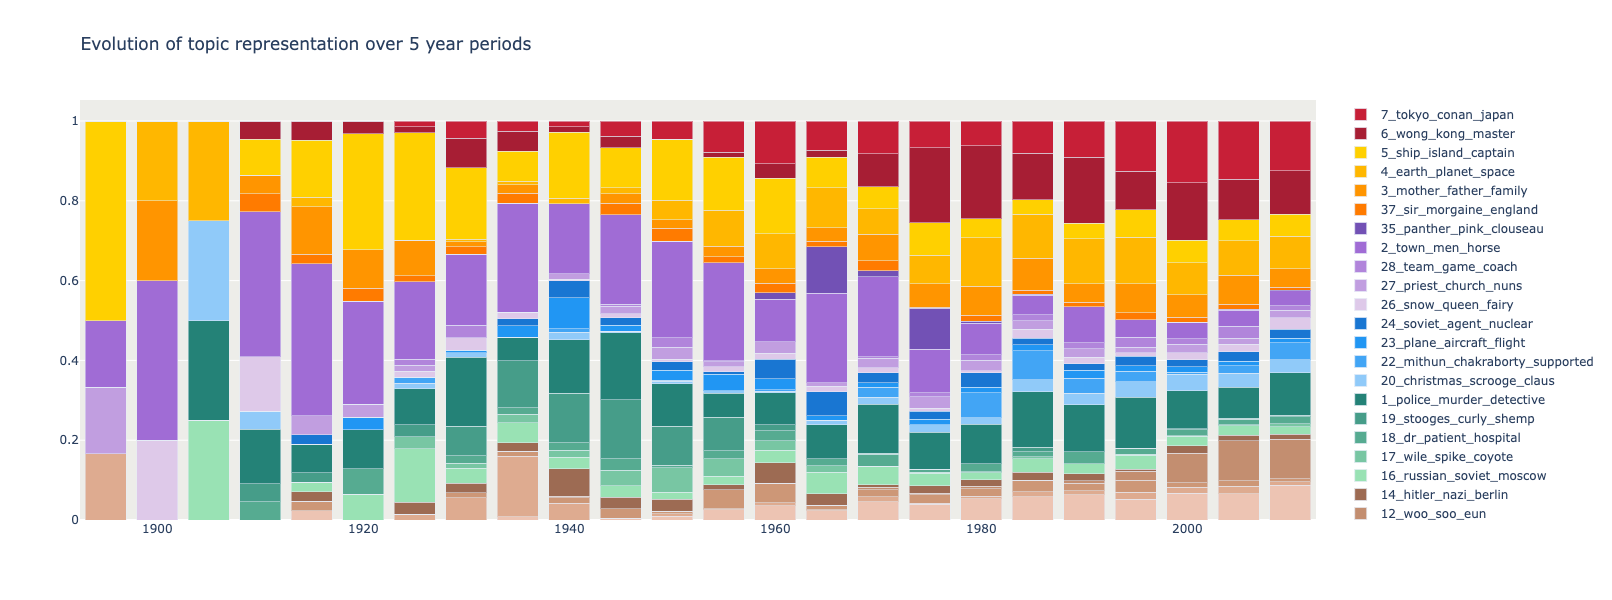

In [164]:
# Original colour palette leaving it here just in case it's needed elsewhere
# Shades of 
colours = ["DEC9E9", "C19EE0", "B185DB", "A06CD5", "7251B5", "6247AA",   #violet
           "99E2B4", "78C6A3", "56AB91", "469D89", "248277", "036666",   #green
           "FF7B00", "FF9500", "FFAA00", "FFB700", "FFD000", "FFEA00",   #yellow
           "641220", "85182A", "A71E34", "B21E35", "C71F37", "E01E37",   #red
           "E3F2FD", "90CAF9", "42A5F5", "2196F3", "1976D2", "0D47A1",   #blue
           "FF0A54", "FF5C8A", "FF85A1", "FF99AC", "F9BEC7", "FAE0E4",   #pink
           "EDC4B3", "DEAB90", "CD9777", "C38E70", "9D6B53", "774936"]   #brown

colours = ["EDC4B3", "DEAB90", "CD9777", "C38E70", "9D6B53", 
           "99E2B4", "78C6A3", "56AB91", "469D89", "248277", 
           "90CAF9", "42A5F5", "2196F3", "1976D2", 
           "DEC9E9", "C19EE0", "B185DB", "A06CD5", "7251B5", 
           "FF7B00", "FF9500", "FFB700", "FFD000",  
           "A71E34",  "C71F37", ]


colours = ["#"+colour for colour in colours]

# Same as before - Can be deleted if we keep all graphs 
cross_tab_prop = pd.crosstab(index=BERT_movies_with_year["five_year_period"].astype(int),
                             columns=BERT_movies_with_year["BERT_names"],
                             normalize="index")

plot_data = []
for i, x in enumerate(cross_tab_prop.columns):
    plot_data.append(go.Bar(name=str(x), x=cross_tab_prop.index, y=cross_tab_prop[x], marker_color = colours[i]))

figure = go.Figure(plot_data)
figure.update_layout(barmode = 'stack',
                     width = 900,
                     height = 600,
                     autosize = True,
                     title_text = "Evolution of topic representation over 5 year periods",
                     plot_bgcolor="#edede9",
                    )

figure.show()

figure.write_html("data/bert_topics_time.html")

### 1.2.1 With LDA <a id='1.2.1'></a>

<AxesSubplot:xlabel='year', ylabel='Topic'>

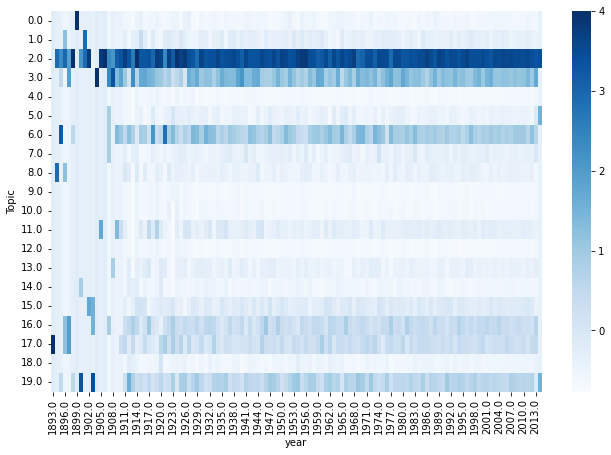

In [33]:
#Create a 2D table with topics as rows and years as columns
for_heatmap_LDA = movies_with_year.groupby(['year','Topic'])['WikiMovieID'].count().reset_index().sort_values(by='year')
for_heatmap_LDA = for_heatmap_LDA.pivot(columns = 'year', index='Topic', values= 'WikiMovieID').fillna(0)

#Row normalization
#cols = for_heatmap_LDA.columns
#for col in cols:
#    for_heatmap_LDA['{}_'.format(col)] = (for_heatmap_LDA[col] - for_heatmap_LDA.mean(axis=1) ) / for_heatmap_LDA.std(axis=1)
#cols_z = ['{}_'.format(col) for col in cols]

#Column normalization
for_heatmap_LDA = (for_heatmap_LDA - for_heatmap_LDA.mean()) / for_heatmap_LDA.std()

fig,ax=plt.subplots(figsize=(11,7))
#sns.heatmap(for_heatmap_LDA[cols_z], ax = ax, yticklabels=True, cmap="Blues", vmax = 5)
sns.heatmap(for_heatmap_LDA, ax = ax, yticklabels=True, cmap="Blues", vmax = 4)

### 1.2.2 With BERT <a id='1.2.2'></a>

<AxesSubplot:xlabel='year', ylabel='BERT_names'>

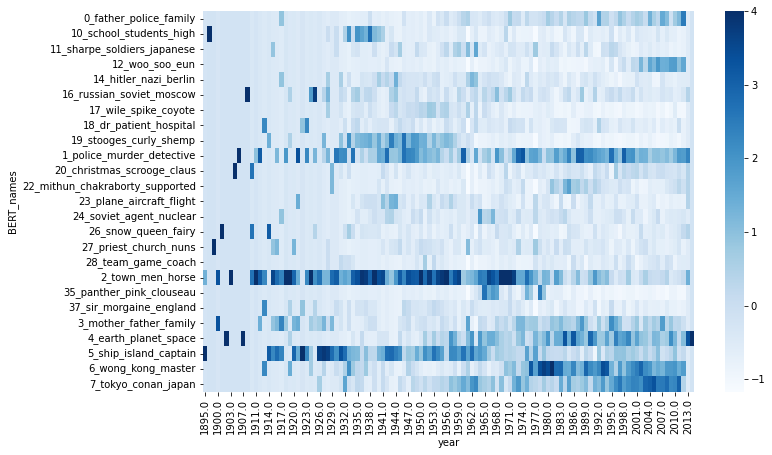

In [34]:
#Create a 2D table with topics as rows and years as columns
for_heatmap_BERT = BERT_movies_with_year.groupby(['year','BERT_names'])['WikiMovieID'].count().reset_index().sort_values(by='year')
for_heatmap_BERT = for_heatmap_BERT.pivot(columns = 'year', index='BERT_names', values= 'WikiMovieID').fillna(0)

#Column normalization
for_heatmap_BERT = (for_heatmap_BERT - for_heatmap_BERT.mean()) / for_heatmap_BERT.std()

fig,ax=plt.subplots(figsize=(11,7))
#sns.heatmap(for_heatmap_LDA[cols_z], ax = ax, yticklabels=True, cmap="Blues", vmax = 5)
sns.heatmap(for_heatmap_BERT, ax = ax, yticklabels=True, cmap="Blues", vmax = 4)

---

# 2. Concerns <a id='2'></a>

## 2.1 Categories across movies <a id='2.1'></a>

### 2.1.1 Percentage of movies <a id='2.1.1'></a>

Look for percentage of movies that are in a certain category
- first by count all non-null entries for each categories
- then by restricting to only movies having a score greater than 0.01

In [35]:
def count_movies_category(category, threshold):
    count = np.sum(movies[category].values>threshold)
    return count

In [37]:
categories=["ecological_concern", "health_concern", "conflict_concern", "technological_concern", "space_concern", 
            "gender_inequality_concern", "homophobia_concern", "racism_concern", "mental_concern","relationships_concern"]

non_null = []
for category in categories :
    non_null.append(100 * count_movies_category(category, threshold=0) / len(movies))
high_score = []
for category in categories :
    high_score.append(100 * count_movies_category(category, threshold=0.01) / len(movies))

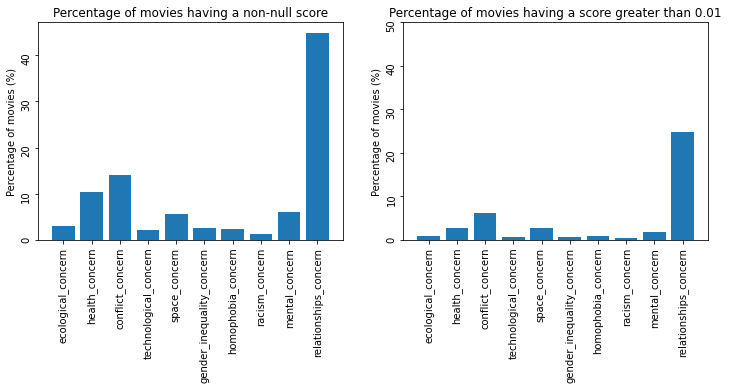

In [38]:
fig, axs = plt.subplots(1, 2, figsize = (12,4))
axs[0].bar(categories, non_null)
axs[0].tick_params(labelrotation=90)
axs[1].set_ylim([0, 50])
axs[0].set_ylabel("Percentage of movies (%)")
axs[0].set_title("Percentage of movies having a non-null score")
axs[1].bar(categories, high_score)
axs[1].tick_params(labelrotation=90)
axs[1].set_ylim([0, 50])
axs[1].set_ylabel("Percentage of movies (%)")
axs[1].set_title("Percentage of movies having a score greater than 0.01")
plt.show()

### 2.1.2 Categories distributions <a id='2.1.2'></a>

For each categories, plot the distribution of the scores

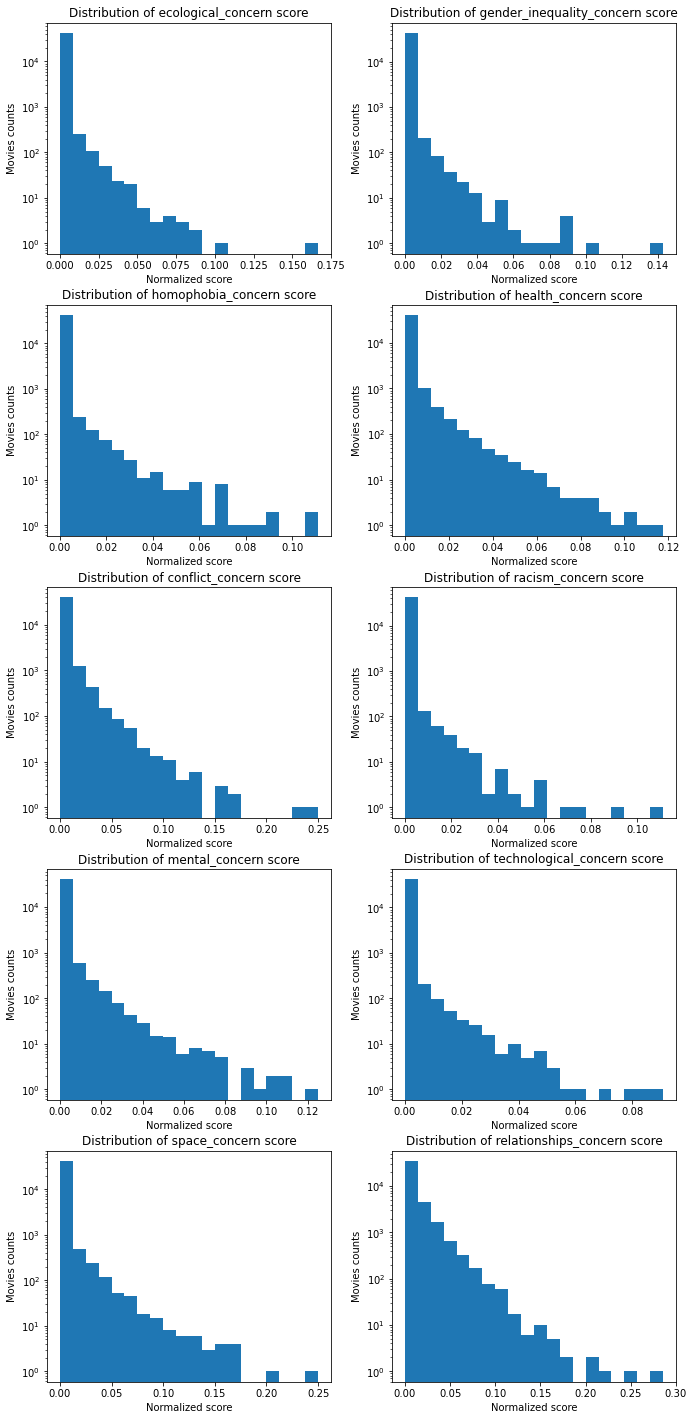

In [39]:
fig, axs = plt.subplots(5, 2, figsize=(10,20))
fig.tight_layout(pad=3)
ix, iy = 0, 0
for i, category in enumerate(categories):
    axs[i%5,i%2].hist(movies[category], log=True, bins=20)
    axs[i%5,i%2].set_title('Distribution of ' + category + ' score')
    axs[i%5,i%2].set_xlabel('Normalized score')
    axs[i%5,i%2].set_ylabel('Movies counts')

plt.show()

## 2.2 Categories over time<a id='2.2'></a>

Set colors for visualizations

In [40]:
categories_color_dict={"ecological_concern":"#f94436", "health_concern":"#8c3214", "conflict_concern":"#f8d044",
                       "technological_concern":"#f28b0c", "space_concern":"#44c2f8", "gender_inequality_concern":"#6ab867",
                       "homophobia_concern":"#de489f", "racism_concern":"#489ede", "mental_concern":"#80807d",
                       "relationships_concern":"#adf763"}

Bootstrap method for confidence intervals

In [41]:
def bootstrap_CI(data, nbr_draws):
    means = np.zeros(nbr_draws)
    data = np.array(data)

    for n in range(nbr_draws):
        indices = np.random.randint(0, len(data), len(data))
        data_tmp = data[indices] 
        means[n] = np.nanmean(data_tmp)

    return [np.nanpercentile(means, 2.5),np.nanpercentile(means, 97.5)]

### 2.2.1 Every year <a id='2.2.1'></a>

In [42]:
bootstrap_CIs_1year = {}

for category in categories:
    bootstrap_CIs_1year['Lower_{}'.format(category)]=[]
    bootstrap_CIs_1year['Upper_{}'.format(category)]=[]
    
for group_name, group in movies_with_year.groupby("year"):
    for category in categories:
        bootstrap_CIs_1year['Lower_{}'.format(category)].append(bootstrap_CI(group[category],1000)[0])
        bootstrap_CIs_1year['Upper_{}'.format(category)].append(bootstrap_CI(group[category],1000)[1])

Categories evolution every year

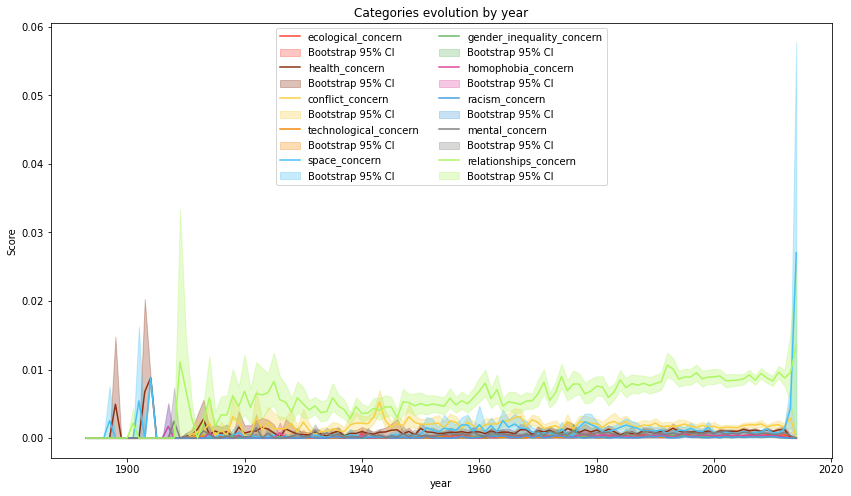

In [43]:
fig = plt.figure(figsize=(14,8))

for category in categories:
    temp = movies_with_year.groupby(["year"])[category].mean()
    fig = temp.plot(label=category, color=categories_color_dict[category])
    fig = plt.fill_between(np.sort(movies_with_year["year"].unique()),
                           bootstrap_CIs_1year['Lower_{}'.format(category)],
                           bootstrap_CIs_1year['Upper_{}'.format(category)],
                           alpha = 0.3,
                           color=categories_color_dict[category],label='Bootstrap 95% CI')
    
fig = plt.title("Categories evolution by year")
fig = plt.ylabel('Score')
fig = plt.legend(loc='upper center', ncol=2)
fig = plt.show()

### 2.2.2 Every five years <a id='2.2.2'></a>

In [44]:
bootstrap_CIs_5year = {}

for category in categories:
    bootstrap_CIs_5year['Lower_{}'.format(category)]=[]
    bootstrap_CIs_5year['Upper_{}'.format(category)]=[]
    
for group_name, group in movies_with_year.groupby("five_year_period"):
    for category in categories:
        bootstrap_CIs_5year['Lower_{}'.format(category)].append(bootstrap_CI(group[category],1000)[0])
        bootstrap_CIs_5year['Upper_{}'.format(category)].append(bootstrap_CI(group[category],1000)[1])

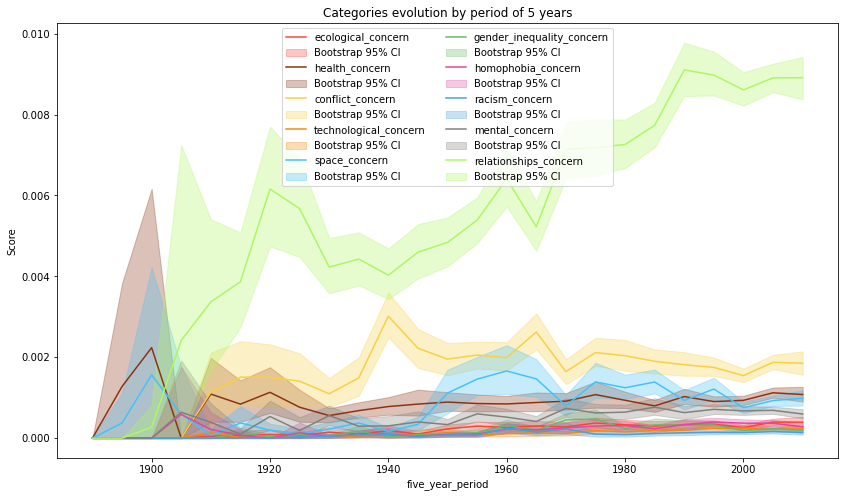

In [45]:
# every five years
fig = plt.figure(figsize=(14,8))

for category in categories:
    temp = movies_with_year.groupby(["five_year_period"])[category].mean()
    fig = temp.plot(label=category, color=categories_color_dict[category])
    fig = plt.fill_between(np.sort(movies_with_year["five_year_period"].unique()),
                           bootstrap_CIs_5year['Lower_{}'.format(category)],
                           bootstrap_CIs_5year['Upper_{}'.format(category)],
                           alpha = 0.3,
                           color=categories_color_dict[category],label='Bootstrap 95% CI')
    
fig = plt.title("Categories evolution by period of 5 years")
fig = plt.ylabel('Score')
fig = plt.legend(loc='upper center', ncol=2)
fig = plt.savefig('categ_five_years.png')
fig = plt.show()

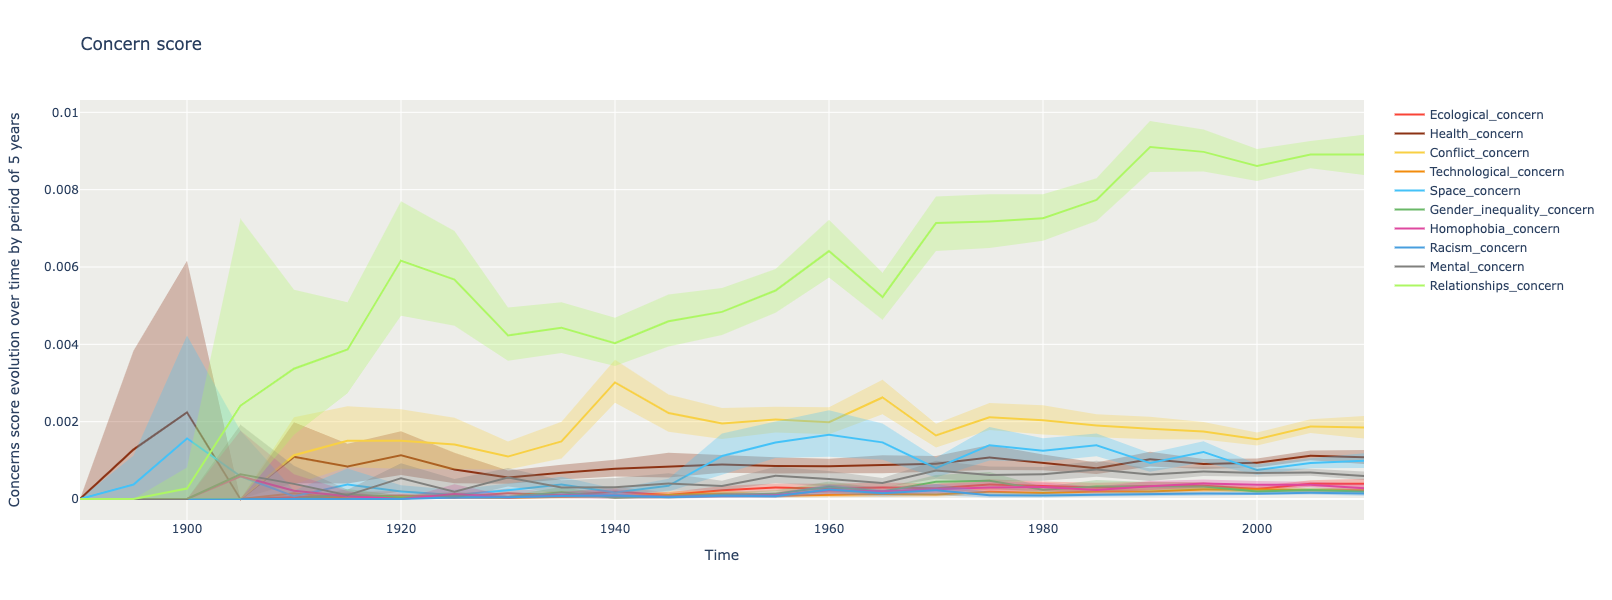

In [159]:
# Interactive using plotly
fig = make_subplots()
x = np.sort(movies_with_year["five_year_period"].unique()).tolist()

for category in categories:
    # Mean of category score over five year period 
    y = movies_with_year.groupby(["five_year_period"])[category].mean().values
    # Bootstrap 95% CI
    y_lower = bootstrap_CIs_5year['Lower_{}'.format(category)]
    y_upper = bootstrap_CIs_5year['Upper_{}'.format(category)]
    
    # Trace for mean score
    trace_mean_score = go.Scatter(  x=x,
                                    y=y,
                                    line=dict(color=categories_color_dict[category]),
                                    mode='lines',
                                    name=category.capitalize()
                                 )
    # Tracce for CI
    trace_CI = go.Scatter(  x=x+x[::-1], 
                            y=y_upper+y_lower[::-1], 
                            fill='toself',
                            fillcolor=categories_color_dict[category],
                            opacity=0.3,
                            line=dict(color='rgba(255,255,255,0)'),
                            hoverinfo="skip",
                            showlegend=False
                        )
    
    # Updating figure 
    fig.add_trace(trace_mean_score)
    fig.add_trace(trace_CI)

fig.update_layout(
    yaxis_title='Concerns score evolution over time by period of 5 years',
    xaxis_title='Time',
    title='Concern score',
    width=900,
    height=600,
    plot_bgcolor="#edede9",
    hovermode="x unified"
)
fig.show()
fig.write_html("data/concern_score_time.html")

In [ ]:
fig, axs = plt.subplots(5, 2, figsize=(8,22), constrained_layout=True) 
for i, c in enumerate(categories):
    axs[i%5, i%2].imshow(Image.open("data/"+c+"_wc.png"))
    axs[i%5, i%2].axis('off')
    axs[i%5, i%2].set_title(c)
fig.suptitle("Concern words extracted from movies plot summaries")
plt.show()

---

# 3. Sentiments <a id='3'></a>

## 3.1 The sentiments <a id='3.1'></a>

### 3.1.1 Plot sentiment analysis <a id='3.1.1'></a>

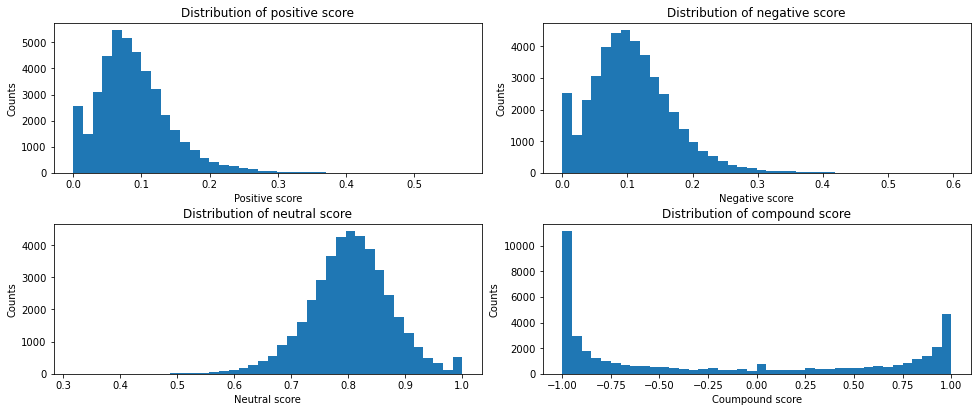

In [49]:
fig, axs = plt.subplots(2, 2, figsize=(14,6))
fig.tight_layout(pad=3)
axs[0,0].hist(movies.positive_score,bins=40)
axs[0,0].set_title('Distribution of positive score')
axs[0,0].set_xlabel('Positive score')
axs[0,0].set_ylabel('Counts')

axs[0,1].hist(movies.negative_score,bins=40)
axs[0,1].set_title('Distribution of negative score')
axs[0,1].set_xlabel('Negative score')
axs[0,1].set_ylabel('Counts')

axs[1,0].hist(movies.neutral_score,bins=40)
axs[1,0].set_title('Distribution of neutral score')
axs[1,0].set_xlabel('Neutral score')
axs[1,0].set_ylabel('Counts')

axs[1,1].hist(movies.compound_score,bins=40)
axs[1,1].set_title('Distribution of compound score')
axs[1,1].set_xlabel('Coumpound score')
axs[1,1].set_ylabel('Counts')

plt.show()

### 3.1.2 Plot multi-sentiments <a id='3.1.2'></a>

Emotional affects measured include the following:

- fear
- anger
- anticipation
- trust
- surprise
- positive
- negative
- sadness
- disgust
- joy

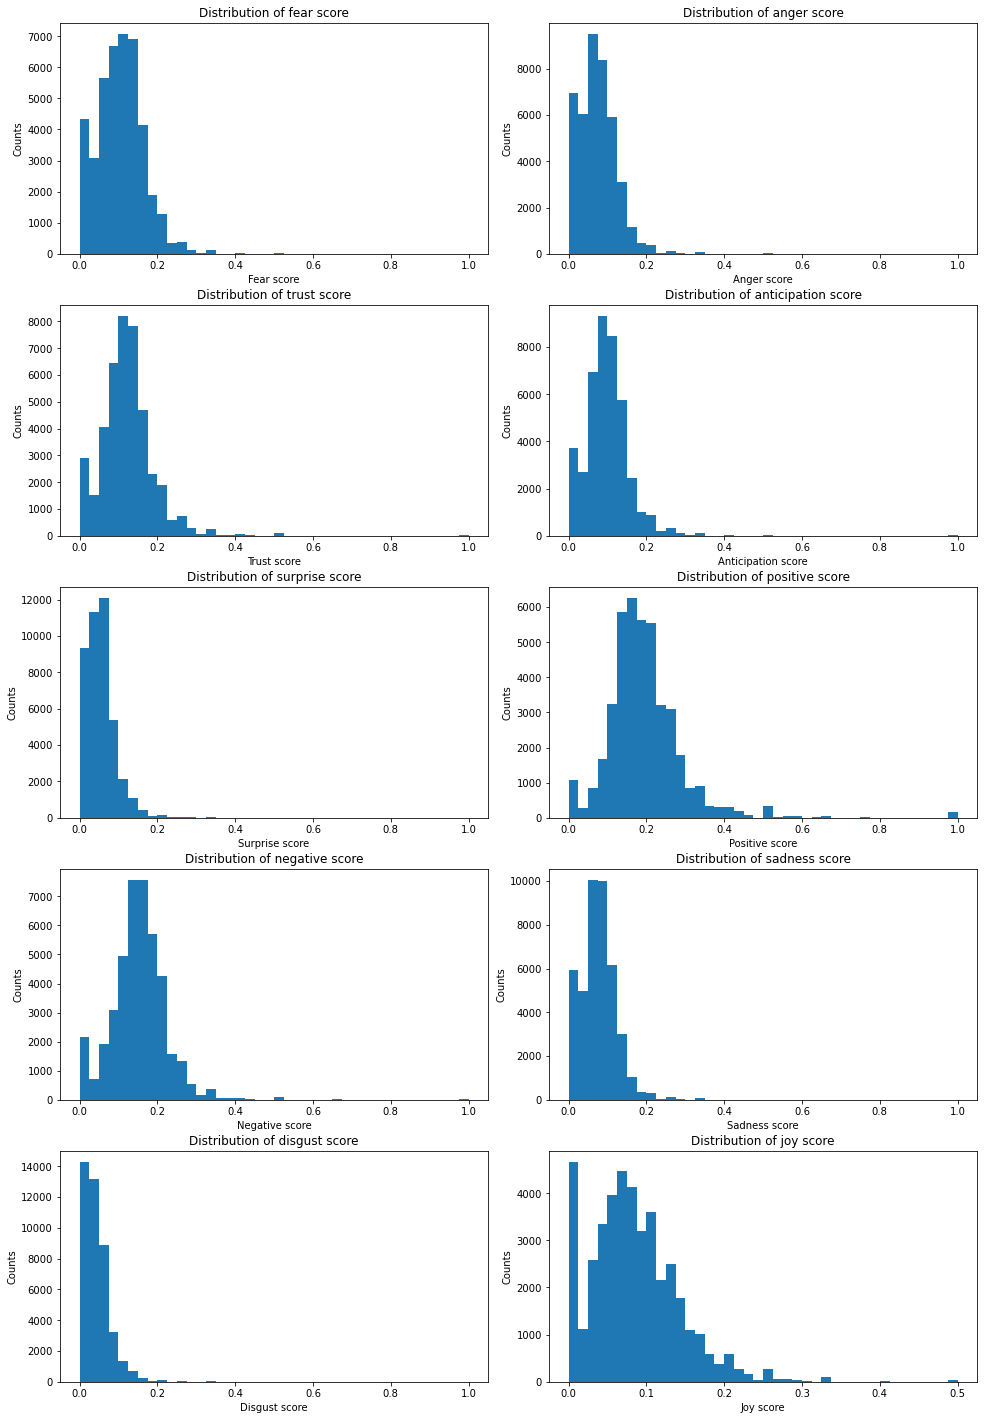

In [50]:
fig, axs = plt.subplots(5, 2, figsize=(14,20))
fig.tight_layout(pad=3)
axs[0,0].hist(movies.multi_scores.apply(lambda score_dict: score_dict['fear']),bins=40)
axs[0,0].set_title('Distribution of fear score')
axs[0,0].set_xlabel('Fear score')
axs[0,0].set_ylabel('Counts')

axs[0,1].hist(movies.multi_scores.apply(lambda score_dict: score_dict['anger']),bins=40)
axs[0,1].set_title('Distribution of anger score')
axs[0,1].set_xlabel('Anger score')
axs[0,1].set_ylabel('Counts')

axs[1,0].hist(movies.multi_scores.apply(lambda score_dict: score_dict['trust']),bins=40)
axs[1,0].set_title('Distribution of trust score')
axs[1,0].set_xlabel('Trust score')
axs[1,0].set_ylabel('Counts')

axs[1,1].hist(movies.multi_scores.apply(lambda score_dict: score_dict['anticipation'] if 'anticipation' in score_dict else 0),bins=40)
axs[1,1].set_title('Distribution of anticipation score')
axs[1,1].set_xlabel('Anticipation score')
axs[1,1].set_ylabel('Counts')

axs[2,0].hist(movies.multi_scores.apply(lambda score_dict: score_dict['surprise']),bins=40)
axs[2,0].set_title('Distribution of surprise score')
axs[2,0].set_xlabel('Surprise score')
axs[2,0].set_ylabel('Counts')

axs[2,1].hist(movies.multi_scores.apply(lambda score_dict: score_dict['positive']),bins=40)
axs[2,1].set_title('Distribution of positive score')
axs[2,1].set_xlabel('Positive score')
axs[2,1].set_ylabel('Counts')

axs[3,0].hist(movies.multi_scores.apply(lambda score_dict: score_dict['negative']),bins=40)
axs[3,0].set_title('Distribution of negative score')
axs[3,0].set_xlabel('Negative score')
axs[3,0].set_ylabel('Counts')

axs[3,1].hist(movies.multi_scores.apply(lambda score_dict: score_dict['sadness']),bins=40)
axs[3,1].set_title('Distribution of sadness score')
axs[3,1].set_xlabel('Sadness score')
axs[3,1].set_ylabel('Counts')

axs[4,0].hist(movies.multi_scores.apply(lambda score_dict: score_dict['disgust']),bins=40)
axs[4,0].set_title('Distribution of disgust score')
axs[4,0].set_xlabel('Disgust score')
axs[4,0].set_ylabel('Counts')

axs[4,1].hist(movies.multi_scores.apply(lambda score_dict: score_dict['joy']),bins=40)
axs[4,1].set_title('Distribution of joy score')
axs[4,1].set_xlabel('Joy score')
axs[4,1].set_ylabel('Counts')


plt.show()

## 2.2 Sentiments over time <a id='2.2'></a>

In [51]:
movies.head()

WikiMovieID FreeMovieID                      Title ReleaseDate     Revenue  \
0       975900   /m/03vyhn             Ghosts of Mars  2001-08-24  14010832.0   
1      9363483  /m/0285_cd           White Of The Eye        1987         NaN   
2       261236   /m/01mrr1          A Woman in Flames        1983         NaN   
3     18998739  /m/04jcqvw  The Sorcerer's Apprentice        2002         NaN   
4      6631279   /m/0gffwj                Little city  1997-04-04         NaN   

   Runtime           Languages                   Countries  \
0     98.0  [English Language]  [United States of America]   
1    110.0  [English Language]            [United Kingdom]   
2    106.0   [German Language]                   [Germany]   
3     86.0  [English Language]              [South Africa]   
4     93.0  [English Language]  [United States of America]   

                                              Genres  \
0  [Thriller, Science Fiction, Horror, Adventure,...   
1  [Thriller, Erotic thriller, Psychological thri...   
2                                            [Drama]   
3    [Family Film, Fantasy, Adventure, World cinema]   
4  [Romantic comedy, Ensemble Film, Comedy-drama,...   

                                                Plot  ... conflict_concern  \
0  Set in the second half of the 22nd century, th...  ...         0.004484   
1  A series of murders of rich young women throug...  ...         0.000000   
2  Eva, an upper class housewife, becomes frustra...  ...         0.000000   
3  Every hundred years, the evil Morgana  returns...  ...         0.000000   
4  Adam, a San Francisco-based artist who works a...  ...         0.000000   

  technological_concern space_concern gender_inequality_concern  \
0                   0.0      0.013453                       0.0   
1                   0.0      0.003257                       0.0   
2                   0.0      0.000000                       0.0   
3                   0.0      0.000000                       0.0   
4                   0.0      0.000000                       0.0   

  homophobia_concern racism_concern mental_concern relationships_concern  \
0                0.0            0.0            0.0              0.004484   
1                0.0            0.0            0.0              0.003257   
2                0.0            0.0            0.0              0.000000   
3                0.0            0.0            0.0              0.000000   
4                0.0            0.0            0.0              0.030928   

     year  five_year_period  
0  2001.0            2000.0  
1  1987.0            1985.0  
2  1983.0            1980.0  
3  2002.0            2000.0  
4  1997.0            1995.0  

[5 rows x 62 columns]

In [52]:
movies_with_year['positive_score'].isna().sum()

0

In [53]:
bootstrap_CIs_1year = {}
sentiments_SA = ['positive', 'negative', 'neutral', 'compound']
multi_sentiments=['fear','anger','trust','surprise','sadness','disgust','joy','anticipation']

for key in sentiments_SA:
    bootstrap_CIs_1year['Lower_{}'.format(key)]=[]
    bootstrap_CIs_1year['Upper_{}'.format(key)]=[]
for key in multi_sentiments:
    bootstrap_CIs_1year['Lower_{}'.format(key)]=[]
    bootstrap_CIs_1year['Upper_{}'.format(key)]=[]
    
for group_name, group in movies_with_year.groupby(["year"]):
    for key in sentiments_SA:
        bootstrap_CIs_1year['Lower_{}'.format(key)].append(bootstrap_CI(group['{}_score'.format(key)],1000)[0])
        bootstrap_CIs_1year['Upper_{}'.format(key)].append(bootstrap_CI(group['{}_score'.format(key)],1000)[1])
    for key_ in multi_sentiments:
        bootstrap_CIs_1year['Lower_{}'.format(key_)].append(bootstrap_CI(group['multi_{}'.format(key_)],1000)[0])
        bootstrap_CIs_1year['Upper_{}'.format(key_)].append(bootstrap_CI(group['multi_{}'.format(key_)],1000)[1])


In [43]:
bootstrap_CIs_1year['Lower_positive'][:10]

[0.0,
 0.113,
 0.005666666666666667,
 0.007,
 0.01225,
 0.009992857142857144,
 0.021,
 0.042333333333333334,
 0.06,
 0.0]

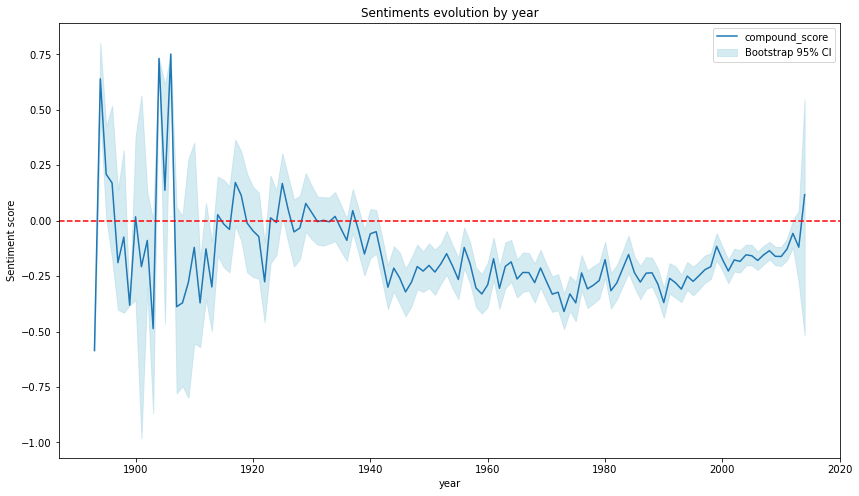

In [54]:
# PLot of SA over time (years)

fig = plt.figure(figsize=(14,8))
#Means
temp = movies_with_year.groupby(["year"])['compound_score'].mean()
fig = temp.plot()
fig = plt.axhline(y=0,color='red',linestyle='--')

#Boostrap CIs for the mean scores
fig = plt.fill_between(np.sort(movies_with_year["year"].unique()),bootstrap_CIs_1year['Lower_compound'],bootstrap_CIs_1year['Upper_compound'], alpha = 0.5, color = 'lightblue', label='Bootstrap 95% CI')

fig = plt.title("Sentiments evolution by year")
fig = plt.ylabel('Sentiment score')
fig = plt.legend()
fig = plt.show()

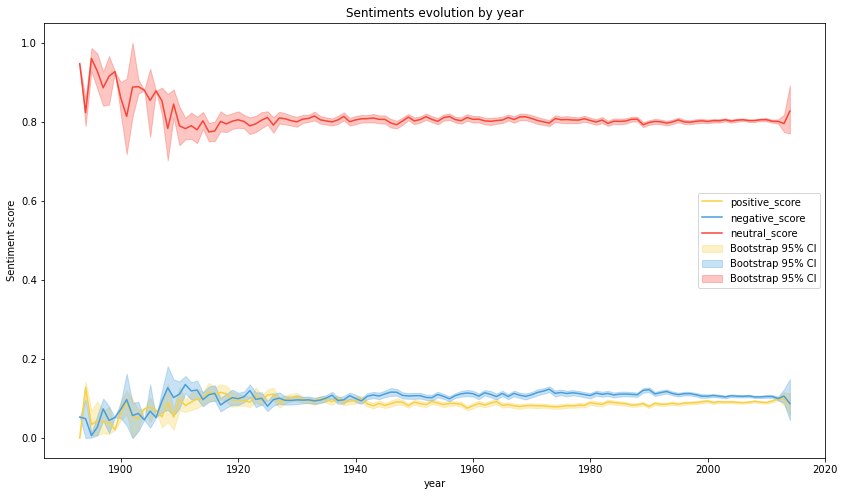

In [55]:
# PLot of SA over time (years)

fig = plt.figure(figsize=(14,8))
#Mans
temp = movies_with_year.groupby(["year"])['positive_score'].mean()
fig = temp.plot(color='#f8d044')
temp = movies_with_year.groupby(["year"])['negative_score'].mean()
fig = temp.plot(color='#489ede')
temp = movies_with_year.groupby(["year"])['neutral_score'].mean()
fig = temp.plot(color='#f94436')


#Boostrap CIs for the mean scores
fig = plt.fill_between(np.sort(movies_with_year["year"].unique()),bootstrap_CIs_1year['Lower_positive'],bootstrap_CIs_1year['Upper_positive'], alpha = 0.3, color = '#f8d044',label='Bootstrap 95% CI')
fig = plt.fill_between(np.sort(movies_with_year["year"].unique()),bootstrap_CIs_1year['Lower_negative'],bootstrap_CIs_1year['Upper_negative'], alpha = 0.3, color = '#489ede',label='Bootstrap 95% CI')
fig = plt.fill_between(np.sort(movies_with_year["year"].unique()),bootstrap_CIs_1year['Lower_neutral'],bootstrap_CIs_1year['Upper_neutral'], alpha = 0.3, color = '#f94436',label='Bootstrap 95% CI')

fig = plt.title("Sentiments evolution by year")
fig = plt.ylabel('Sentiment score')
fig = plt.legend()
fig = plt.show()

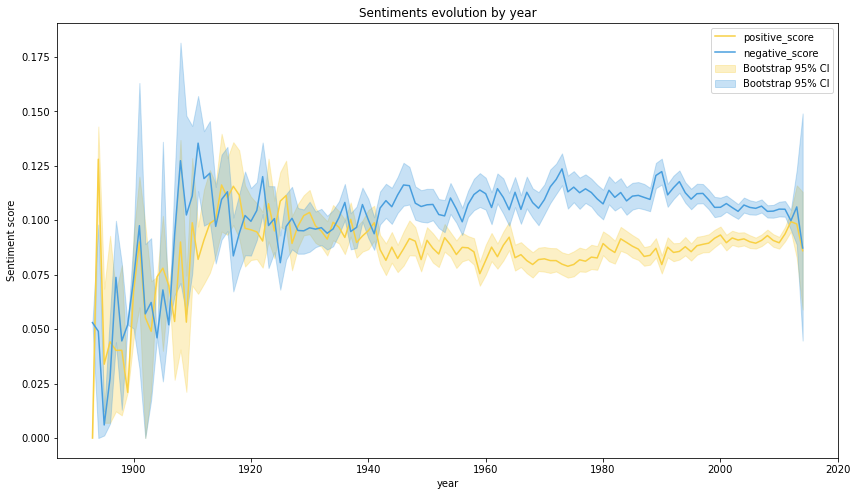

In [56]:
# PLot of SA over time (years)

fig = plt.figure(figsize=(14,8))
temp = movies_with_year.groupby(["year"])['positive_score'].mean()
fig = temp.plot(color='#f8d044')
temp = movies_with_year.groupby(["year"])['negative_score'].mean()
fig = temp.plot(color='#489ede')
fig = plt.fill_between(np.sort(movies_with_year["year"].unique()),bootstrap_CIs_1year['Lower_positive'],bootstrap_CIs_1year['Upper_positive'], alpha = 0.3, color = '#f8d044',label='Bootstrap 95% CI')
fig = plt.fill_between(np.sort(movies_with_year["year"].unique()),bootstrap_CIs_1year['Lower_negative'],bootstrap_CIs_1year['Upper_negative'], alpha = 0.3, color = '#489ede',label='Bootstrap 95% CI')

fig = plt.title("Sentiments evolution by year")
fig = plt.ylabel('Sentiment score')
fig = plt.legend()
fig = plt.show()

In [57]:
#movies_with_year.groupby(["year"]).indices #returns a dict of the indices for each year

In [58]:
multi_sentiments_color_dict={'fear':'#f94436','anger':'#8c3214','trust':'#f8d044','surprise':'#f28b0c',
                             'sadness':'#44c2f8','disgust':'#6ab867','joy':'#de489f','anticipation':'#489ede'}

multi_sentiments_color_dict['fear']

'#f94436'

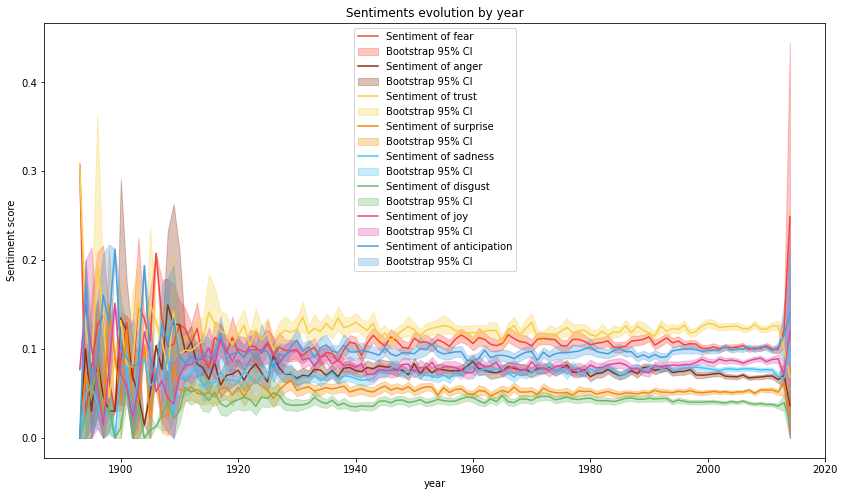

In [59]:
# PLot of multi SA over time (years)
multi_sentiments_color_dict={'fear':'#f94436','anger':'#8c3214','trust':'#f8d044','surprise':'#f28b0c',
                             'sadness':'#44c2f8','disgust':'#6ab867','joy':'#de489f','anticipation':'#489ede'}
fig = plt.figure(figsize=(14,8))

for key in multi_sentiments:
    temp = movies_with_year.groupby(["year"])['multi_{}'.format(key)].mean()
    fig = temp.plot(label='Sentiment of {}'.format(key), color=multi_sentiments_color_dict['{}'.format(key)])
    fig = plt.fill_between(np.sort(movies_with_year["year"].unique()),bootstrap_CIs_1year['Lower_{}'.format(key)],bootstrap_CIs_1year['Upper_{}'.format(key)], alpha = 0.3, color=multi_sentiments_color_dict['{}'.format(key)],label='Bootstrap 95% CI')
    
#fig = plt.fill_between(
fig = plt.title("Sentiments evolution by year")
fig = plt.ylabel('Sentiment score')
fig = plt.legend(loc='upper center')
fig = plt.show()

In [60]:
bootstrap_CIs_5years = {}

for key in sentiments_SA:
    bootstrap_CIs_5years['Lower_{}'.format(key)]=[]
    bootstrap_CIs_5years['Upper_{}'.format(key)]=[]
for key in multi_sentiments:
    bootstrap_CIs_5years['Lower_{}'.format(key)]=[]
    bootstrap_CIs_5years['Upper_{}'.format(key)]=[]
    
for group_name, group in movies_with_year.groupby(["five_year_period"]):
    for key in sentiments_SA:
        bootstrap_CIs_5years['Lower_{}'.format(key)].append(bootstrap_CI(group['{}_score'.format(key)],1000)[0])
        bootstrap_CIs_5years['Upper_{}'.format(key)].append(bootstrap_CI(group['{}_score'.format(key)],1000)[1])
    for key_ in multi_sentiments:
        bootstrap_CIs_5years['Lower_{}'.format(key_)].append(bootstrap_CI(group['multi_{}'.format(key_)],1000)[0])
        bootstrap_CIs_5years['Upper_{}'.format(key_)].append(bootstrap_CI(group['multi_{}'.format(key_)],1000)[1])



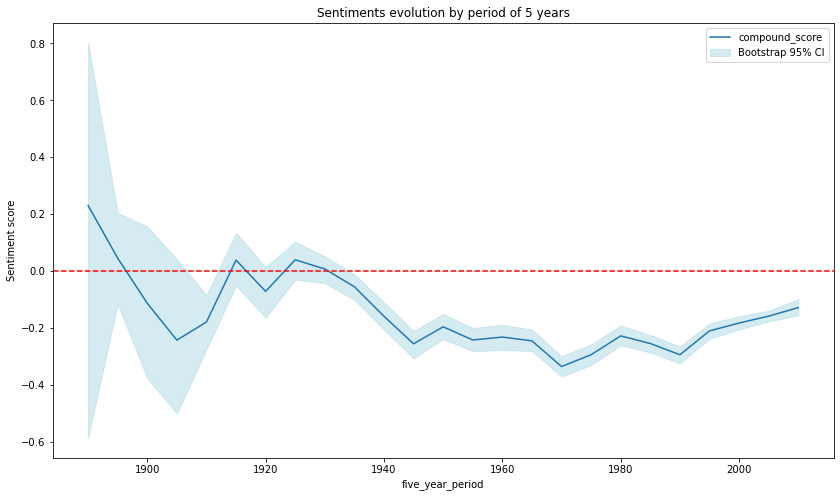

In [61]:
# PLot of SA over time (5years)

fig = plt.figure(figsize=(14,8))
#Means
temp = movies_with_year.groupby(["five_year_period"])['compound_score'].mean()
fig = temp.plot()
fig = plt.axhline(y=0,color='red',linestyle='--')

#Boostrap CIs for the mean scores
fig = plt.fill_between(np.sort(movies_with_year["five_year_period"].unique()),bootstrap_CIs_5years['Lower_compound'],bootstrap_CIs_5years['Upper_compound'], alpha = 0.5, color = 'lightblue',label='Bootstrap 95% CI')

fig = plt.title("Sentiments evolution by period of 5 years")
fig = plt.ylabel('Sentiment score')
fig = plt.legend()
fig = plt.show()

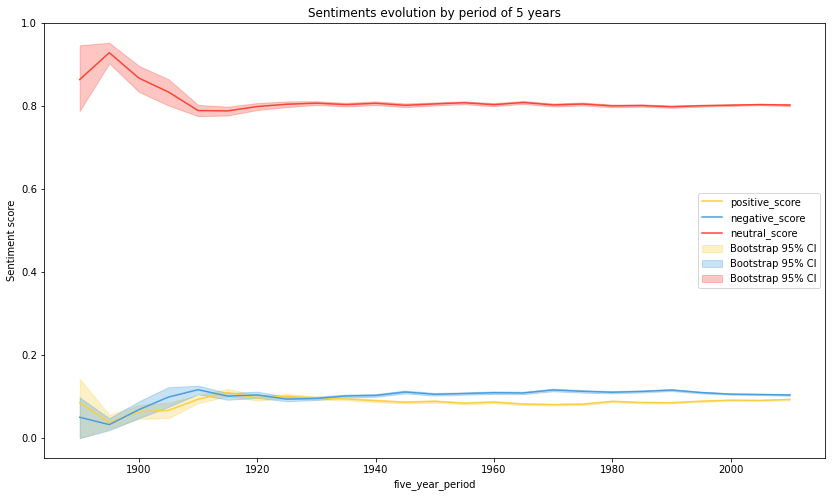

In [62]:
# PLot of SA over time (5years)

fig = plt.figure(figsize=(14,8))
#Mans
temp = movies_with_year.groupby(["five_year_period"])['positive_score'].mean()
fig = temp.plot(color='#f8d044')
temp = movies_with_year.groupby(["five_year_period"])['negative_score'].mean()
fig = temp.plot(color='#489ede')
temp = movies_with_year.groupby(["five_year_period"])['neutral_score'].mean()
fig = temp.plot(color='#f94436')


#Boostrap CIs for the mean scores
fig = plt.fill_between(np.sort(movies_with_year["five_year_period"].unique()),bootstrap_CIs_5years['Lower_positive'],bootstrap_CIs_5years['Upper_positive'], alpha = 0.3, color = '#f8d044',label='Bootstrap 95% CI')
fig = plt.fill_between(np.sort(movies_with_year["five_year_period"].unique()),bootstrap_CIs_5years['Lower_negative'],bootstrap_CIs_5years['Upper_negative'], alpha = 0.3, color = '#489ede',label='Bootstrap 95% CI')
fig = plt.fill_between(np.sort(movies_with_year["five_year_period"].unique()),bootstrap_CIs_5years['Lower_neutral'],bootstrap_CIs_5years['Upper_neutral'], alpha = 0.3, color = '#f94436',label='Bootstrap 95% CI')

fig = plt.title("Sentiments evolution by period of 5 years")
fig = plt.ylabel('Sentiment score')
fig = plt.legend()
fig = plt.show()

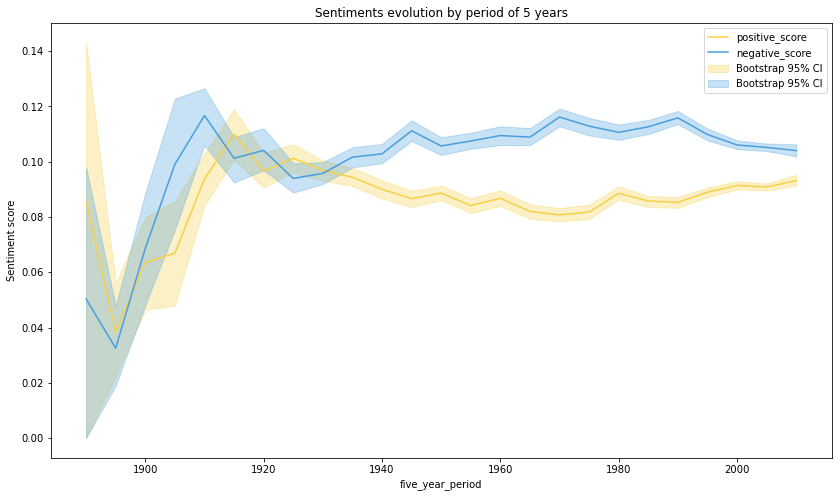

In [63]:
# PLot of SA over time (5years)

fig = plt.figure(figsize=(14,8))
temp = movies_with_year.groupby(["five_year_period"])['positive_score'].mean()
fig = temp.plot(color='#f8d044')
temp = movies_with_year.groupby(["five_year_period"])['negative_score'].mean()
fig = temp.plot(color='#489ede')
fig = plt.fill_between(np.sort(movies_with_year["five_year_period"].unique()),bootstrap_CIs_5years['Lower_positive'],bootstrap_CIs_5years['Upper_positive'], alpha = 0.3, color = '#f8d044',label='Bootstrap 95% CI')
fig = plt.fill_between(np.sort(movies_with_year["five_year_period"].unique()),bootstrap_CIs_5years['Lower_negative'],bootstrap_CIs_5years['Upper_negative'], alpha = 0.3, color = '#489ede',label='Bootstrap 95% CI')

fig = plt.title("Sentiments evolution by period of 5 years")
fig = plt.ylabel('Sentiment score')
fig = plt.legend()
fig = plt.show()

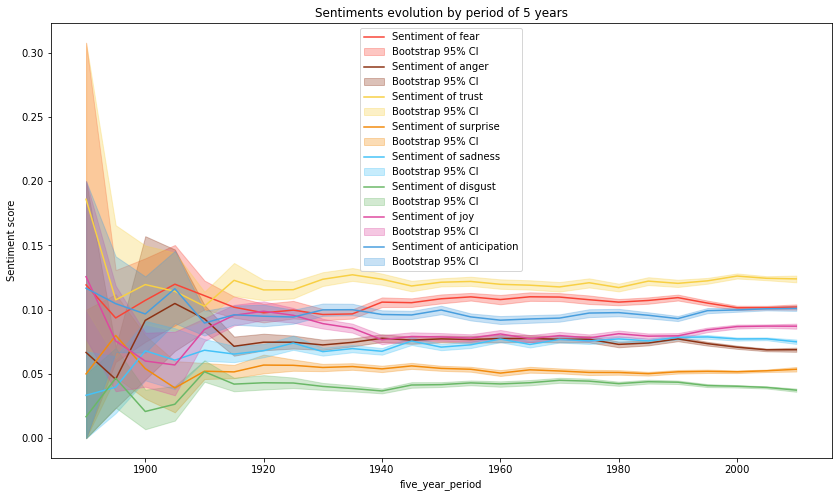

In [64]:
# PLot of multi SA over time (years)
fig = plt.figure(figsize=(14,8))

for key in multi_sentiments:
    temp = movies_with_year.groupby(["five_year_period"])['multi_{}'.format(key)].mean()
    fig = temp.plot(label='Sentiment of {}'.format(key), color=multi_sentiments_color_dict['{}'.format(key)])
    fig = plt.fill_between(np.sort(movies_with_year["five_year_period"].unique()),bootstrap_CIs_5years['Lower_{}'.format(key)],bootstrap_CIs_5years['Upper_{}'.format(key)], alpha = 0.3, color=multi_sentiments_color_dict['{}'.format(key)],label='Bootstrap 95% CI')
    
#fig = plt.fill_between(
fig = plt.title("Sentiments evolution by period of 5 years")
fig = plt.ylabel('Sentiment score')
fig = plt.legend(loc='upper center')
fig = plt.show()

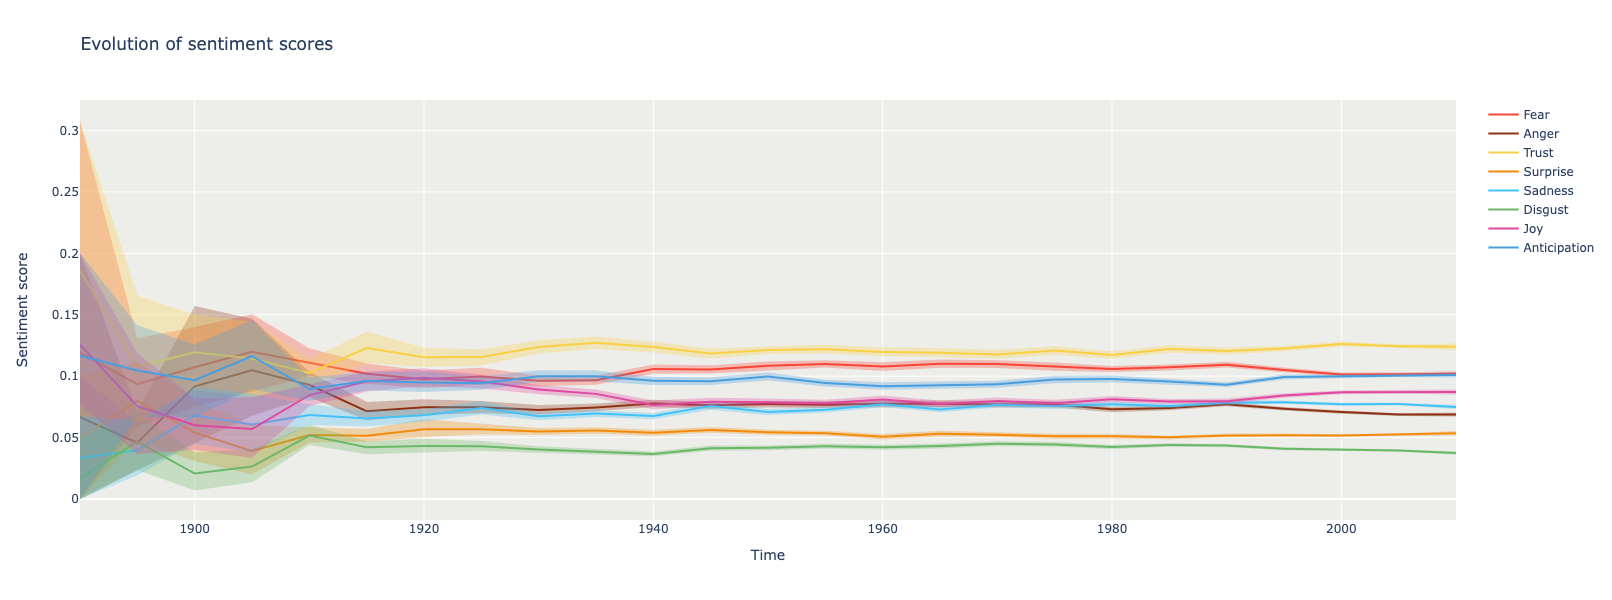

In [160]:
fig = make_subplots()
x = np.sort(movies_with_year["five_year_period"].unique()).tolist()

for key in multi_sentiments:
    # Mean of sentiment score over five year period -> sentiment according to "key"
    y = movies_with_year.groupby(["five_year_period"])['multi_{}'.format(key)].mean().values
    # Bootstrap 95% CI
    y_lower = bootstrap_CIs_5years['Lower_{}'.format(key)]
    y_upper = bootstrap_CIs_5years['Upper_{}'.format(key)]
    
    # Trace for mean score
    trace_mean_score = go.Scatter(  x=x,
                                    y=y,
                                    line=dict(color=multi_sentiments_color_dict[key]),
                                    mode='lines',
                                    name=key.capitalize()
                                 )
    # Tracce for CI
    trace_CI = go.Scatter(  x=x+x[::-1], 
                            y=y_upper+y_lower[::-1], 
                            fill='toself',
                            fillcolor=multi_sentiments_color_dict[key],
                            opacity=0.3,
                            line=dict(color='rgba(255,255,255,0)'),
                            hoverinfo="skip",
                            showlegend=False
                        )
    
    # Updating figure 
    fig.add_trace(trace_mean_score)
    fig.add_trace(trace_CI)

fig.update_layout(
    yaxis_title='Sentiment score',
    xaxis_title='Time',
    title='Evolution of sentiment scores',
    width=900,
    height=600,
    plot_bgcolor="#edede9",
    hovermode="x unified"
)
fig.show()
fig.write_html("data/sentiment_scores_time.html")

---

# 4. Combined <a id='4'></a>

## 4.1 Topics and sentiments <a id='4.1'></a>

### 4.1.1 Topics and sentiments association

To visualize the association of sentiments with each Bert topics (19 most frequent topics from all Bert topics), we use radar plot representations from the `plotly.graph_objects` library. First with neutral, positive and negative scores, then only with positive and negative scores and finally with all multi sentiment scores. 

In [71]:
#Compute the mean sentiment scores for each topic
topics_BERT=bert_topics.head(20).index.tolist()

temp = pd.DataFrame(columns = ['positive', 'negative', 'neutral', 'fear', 'anger', 'anticip', 'trust', 'surprise','positive_multi',
                               'negative_multi','sadness','disgust','joy','anticipation'], 
                   index = topics_BERT)
for topic in topics_BERT:
    #SA
    temp.at[topic,'positive'] = np.mean(movies[movies['BERT']==topic].positive_score)
    temp.at[topic,'negative'] = np.mean(movies[movies['BERT']==topic].negative_score)
    temp.at[topic,'neutral'] = np.mean(movies[movies['BERT']==topic].neutral_score)
    
    #Multi SA
    temp.at[topic,'fear'] = np.mean(movies[movies['BERT']==topic].multi_scores.apply(lambda score_dict: score_dict['fear']))
    temp.at[topic,'anticip'] = np.mean(movies[movies['BERT']==topic].multi_scores.apply(lambda score_dict: score_dict['anticip']))
    temp.at[topic,'trust'] = np.mean(movies[movies['BERT']==topic].multi_scores.apply(lambda score_dict: score_dict['trust']))
    temp.at[topic,'surprise'] = np.mean(movies[movies['BERT']==topic].multi_scores.apply(lambda score_dict: score_dict['surprise']))
    temp.at[topic,'positive_multi'] = np.mean(movies[movies['BERT']==topic].multi_scores.apply(lambda score_dict: score_dict['positive']))
    temp.at[topic,'negative_multi'] = np.mean(movies[movies['BERT']==topic].multi_scores.apply(lambda score_dict: score_dict['negative']))
    temp.at[topic,'sadness'] = np.mean(movies[movies['BERT']==topic].multi_scores.apply(lambda score_dict: score_dict['sadness']))
    temp.at[topic,'disgust'] = np.mean(movies[movies['BERT']==topic].multi_scores.apply(lambda score_dict: score_dict['disgust']))
    temp.at[topic,'joy'] = np.mean(movies[movies['BERT']==topic].multi_scores.apply(lambda score_dict: score_dict['joy']))
    temp.at[topic,'anticipation'] = np.mean(movies[movies['BERT']==topic].multi_scores.apply(lambda score_dict: score_dict['anticipation'] 
                                                                                             if 'anticipation' in score_dict else 0))
    temp.at[topic,'anger'] = np.mean(movies[movies['BERT']==topic].multi_scores.apply(lambda score_dict: score_dict['anger']))
    

In [73]:
#Radar plot of BERT topics for neutral, negative and positive

theta_ = bert_topics.iloc[np.array(topics_BERT)+1]

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
        r=temp.neutral,
        theta=theta_,
        fill='toself',
        name='Neutral sentiment',
        line_color = '#f94436'
))

fig.add_trace(go.Scatterpolar(
        r=temp.negative,
        theta=theta_,
        #mode = 'lines',
        fill='toself',
        name='Negative Sentiment',
        line_color = '#489ede'
))
fig.add_trace(go.Scatterpolar(
        r=temp.positive,
        theta=theta_,
        fill='toself',
        name='Positive sentiment',
        line_color = '#f8d044'
))



fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 1]
    )),
  showlegend=True,    
  plot_bgcolor="#edede9",
)

fig.show(renderer='iframe')
fig.write_html("iframe_figures/radar_chart_trisentiment_BERT.html")

In [75]:
#Radar plot of BERT topics for only negative and positive

theta_ = bert_topics.iloc[np.array(topics_BERT)+1]

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
        r=temp.negative,
        theta=theta_,
        #mode = 'lines',
        fill='toself',
        name='Negative Sentiment',
        line_color = '#489ede'
))
fig.add_trace(go.Scatterpolar(
        r=temp.positive,
        theta=theta_,
        fill='toself',
        name='Positive sentiment',
        line_color = '#f8d044'
))



fig.update_layout(
  plot_bgcolor="#edede9",
  polar=dict(
    radialaxis=dict(
      visible=True
    )),
  showlegend=True
)

fig.show(renderer='iframe')
fig.write_html("iframe_figures/radar_chart_bisentiment_BERT.html")

In [76]:
#Radar plot of BERT topics for multi SA

theta_ = bert_topics.iloc[np.array(topics_BERT)+1] 

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
        r=temp.trust,
        theta=theta_,
        fill='toself',
        name='Trust sentiment',
        line_color = '#f8d044'
))
fig.add_trace(go.Scatterpolar(
        r=temp.fear,
        theta=theta_,
        fill='toself',
        name='Fear sentiment',
        line_color = '#f94436'
))
fig.add_trace(go.Scatterpolar(
        r=temp.anticipation,
        theta=theta_,
        fill='toself',
        name='Anticipation sentiment',
        line_color = '#489ede'
))
#fig.add_trace(go.Scatterpolar(
 #       r=temp.positive_multi,
  #      theta=theta_,
   #     fill='toself',
    #    name='Positive sentiment',
     #   line_color = '#f8d044'
#))
#fig.add_trace(go.Scatterpolar(
 #       r=temp.negative_multi,
  #      theta=theta_,
   #     fill='toself',
    #    name='Negative sentiment',
      #  line_color = '#a39d99'
#))
fig.add_trace(go.Scatterpolar(
        r=temp.joy,
        theta=theta_,
        fill='toself',
        name='Joy sentiment',
        line_color = '#de489f'
))
fig.add_trace(go.Scatterpolar(
        r=temp.anger,
        theta=theta_,
        fill='toself',
        name='Anger sentiment',
        line_color = '#8c3214'
))
fig.add_trace(go.Scatterpolar(
        r=temp.sadness,
        theta=theta_,
        fill='toself',
        name='Sadness sentiment',
        line_color = '#44c2f8'
))
fig.add_trace(go.Scatterpolar(
        r=temp.surprise,
        theta=theta_,
        fill='toself',
        name='Surprise sentiment',
        line_color = '#f28b0c'
))
fig.add_trace(go.Scatterpolar(
        r=temp.disgust,
        theta=theta_,
        fill='toself',
        name='Disgust sentiment',
        line_color = '#6ab867'
))


fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True
    )),
  showlegend=True
)

fig.show(renderer='iframe')
fig.write_html("iframe_figures/radar_chart_multisentiment_BERT.html")

### 4.1.2 Topics and sentiments over time

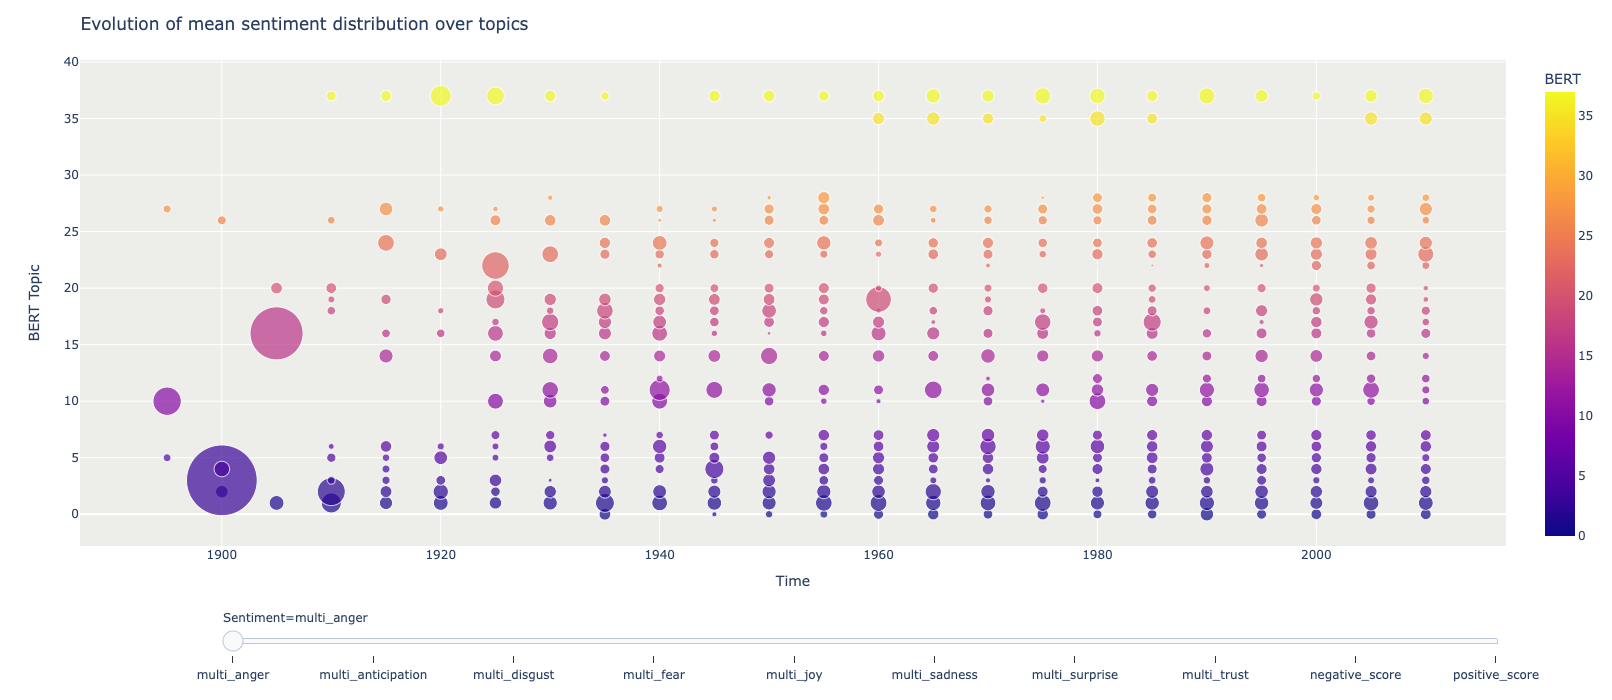

In [161]:
# Sentiments we have investigated
sentiments = ["positive_score", "negative_score", "multi_fear", "multi_anger", "multi_trust", "multi_surprise", "multi_sadness", "multi_disgust", "multi_joy", "multi_anticipation"]

# 
movies_reduced = BERT_movies_with_year[["five_year_period", "BERT"] + sentiments]

sentiments_df = pd.DataFrame()

# Reversing one hot encoding : We do this in order to be able to plot the interactive graph
## In this procedure we dont care about quality (what sentiment score each movie got) but quantity (average scores over years and topics)
## In the initial dataset "movies_reduced" we have 1 row per movie and 1 column for each sentiment. At the end of this loop we will create
## 10 rows for each movie (1 row per sentiment) where each row will have 1 column displaying the name of the sentiment, 1 for the score,
## and 1 for the relative score. Additionally, it will have 2 columns specifying the five_year_period and the BERT topic attributed to the movie.

for sentiment in sentiments:
    temp = movies_reduced[["five_year_period", "BERT"]].copy()
    temp["Sentiment"]= sentiment
    temp["Sentiment_score"]=movies_reduced[sentiment]
    sentiments_df = pd.concat([sentiments_df, temp])

# Getting the mean sentiment score for each five_year_period for each BERT topic
sentiments_df = sentiments_df.groupby(by=["Sentiment", "five_year_period", "BERT"]).mean()


# Putting the indexes into columns
sentiments_df = sentiments_df.reset_index(level=[0,1,2])



# Realtive sentiment score : Our sentiment scores are currently in the set [0,1]. We apply the following transformation to 
# each score f(x)= (100*x)^2 to emphasize on difference so it can be better displayed in the graph.
sentiments_df["Relative_sentiment_score"] = (sentiments_df["Sentiment_score"]*100)**2


fig = px.scatter(sentiments_df, x="five_year_period", y="BERT", animation_frame="Sentiment", 
           size="Relative_sentiment_score", color="BERT", hover_name="BERT", size_max=50, opacity = 0.7)


fig.update_layout( width = 900,
                   height = 700,
                   title_text = "Evolution of mean sentiment distribution over topics",
                   yaxis_title = "BERT Topic",
                   xaxis_title = "Time",
                   plot_bgcolor="#edede9"
                 )


fig["layout"].pop("updatemenus") # drop animation buttons -> no additional information
fig.show()
fig.write_html("data/bert_topics_time_sentiment.html")

## 4.2 Topics and concerns

In [79]:
#Compute the mean concern score for each topic
topics_BERT=bert_topics.head(20).index.tolist()

temp = pd.DataFrame(columns = ['ecological_concern', 'health_concern', 'conflict_concern', 'technological_concern', 'space_concern',
                               'gender_inequality_concern', 'homophobia_concern', 'racism_concern', 'mental_concern', 'relationships_concern'], 
                   index = topics_BERT)

for topic in topics_BERT:
    #Concerns
    temp.at[topic,'ecological_concern'] = np.mean(movies[movies['BERT']==topic].ecological_concern)
    temp.at[topic,'health_concern'] = np.mean(movies[movies['BERT']==topic].health_concern)
    temp.at[topic,'conflict_concern'] = np.mean(movies[movies['BERT']==topic].conflict_concern)
    temp.at[topic,'technological_concern'] = np.mean(movies[movies['BERT']==topic].technological_concern)
    temp.at[topic,'space_concern'] = np.mean(movies[movies['BERT']==topic].space_concern)
    temp.at[topic,'gender_inequality_concern'] = np.mean(movies[movies['BERT']==topic].gender_inequality_concern)
    temp.at[topic,'homophobia_concern'] = np.mean(movies[movies['BERT']==topic].homophobia_concern)
    temp.at[topic,'racism_concern'] = np.mean(movies[movies['BERT']==topic].racism_concern)
    temp.at[topic,'mental_concern'] = np.mean(movies[movies['BERT']==topic].mental_concern)
    temp.at[topic,'relationships_concern'] = np.mean(movies[movies['BERT']==topic].relationships_concern)                                             

In [80]:
#Radar plot of BERT topics for concerns

theta_ = bert_topics.iloc[np.array(topics_BERT)+1] 

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
        r=temp.relationships_concern,
        theta=theta_,
        fill='toself',
        name='Relationships concern',
        line_color = '#f5abd5'
))
fig.add_trace(go.Scatterpolar(
        r=temp.conflict_concern,
        theta=theta_,
        fill='toself',
        name='Conflict_concern',
        line_color = '#f94436'
))
fig.add_trace(go.Scatterpolar(
        r=temp.space_concern,
        theta=theta_,
        fill='toself',
        name='Space concern',
        line_color = '#102a91'
))
fig.add_trace(go.Scatterpolar(
        r=temp.health_concern,
        theta=theta_,
        fill='toself',
        name='Health_concern',
        line_color = '#b4f78f'
))
fig.add_trace(go.Scatterpolar(
        r=temp.mental_concern,
        theta=theta_,
        fill='toself',
        name='Mental concern',
        line_color = '#44c2f8'
))
fig.add_trace(go.Scatterpolar(
        r=temp.ecological_concern,
        theta=theta_,
        fill='toself',
        name='Ecological concern',
        line_color = '#10800e'
))
fig.add_trace(go.Scatterpolar(
        r=temp.technological_concern,
        theta=theta_,
        fill='toself',
        name='Technological concern',
        line_color = '#de489f'
))
fig.add_trace(go.Scatterpolar(
        r=temp.gender_inequality_concern,
        theta=theta_,
        fill='toself',
        name='Gender inequality concern',
        line_color = '#8c3214'
))
fig.add_trace(go.Scatterpolar(
        r=temp.homophobia_concern,
        theta=theta_,
        fill='toself',
        name='Homophobia concern',
        line_color = '#f28b0c'
))
fig.add_trace(go.Scatterpolar(
        r=temp.racism_concern,
        theta=theta_,
        fill='toself',
        name='Racism concern',
        line_color = '#f8d044'
))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
    )),
  showlegend=True
)

fig.show(renderer='iframe')
fig.write_html("iframe_figures/Concerns_vs_BERT.html")

## 4.3 Sentiments and concerns

In this section we will look for a correlation between the sentiments and the topics. In order to do that, we will perform multiple linear regressions where each regression will have the concern as an output and as inputs all the sentiments :

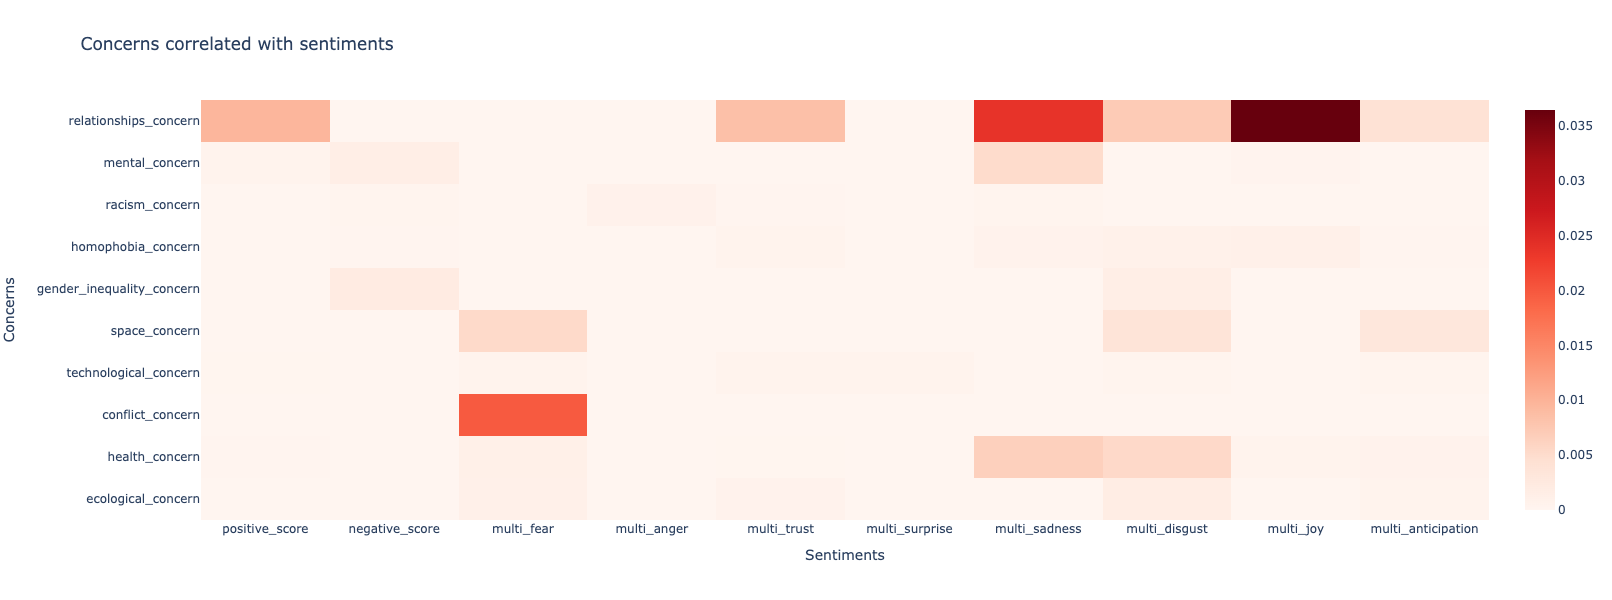

In [162]:
from sklearn.linear_model import LinearRegression
X = movies.loc[:, sentiments]
coefficients = {}

for category in categories:
    y = movies[category]
    model = LinearRegression(fit_intercept=False, positive=True).fit(X,y)
    coefficients[category] = model.coef_

plot_coefficients = [coeff for coeff in coefficients.values()]

fig = go.Figure(data=go.Heatmap(
                   z=plot_coefficients,
                   x=sentiments,
                   y=categories,
                   hoverongaps = False,
                   colorscale="Reds"))

fig.update_layout( width = 800,
                   height = 600,
                   title_text = "Concerns correlated with sentiments",
                   yaxis_title = "Concerns",
                   xaxis_title = "Sentiments",
                 )
fig.show()
fig.write_html("data/heatmap_sentiments_concerns.html")

---

# 5. Statistical analysis

## 5.1 Over time

In [12]:
movies_with_year['year'].describe()

count    39564.000000
mean      1983.644904
std         25.650007
min       1893.000000
25%       1966.000000
50%       1993.000000
75%       2005.000000
max       2014.000000
Name: year, dtype: float64

Text(0, 0.5, 'Count')

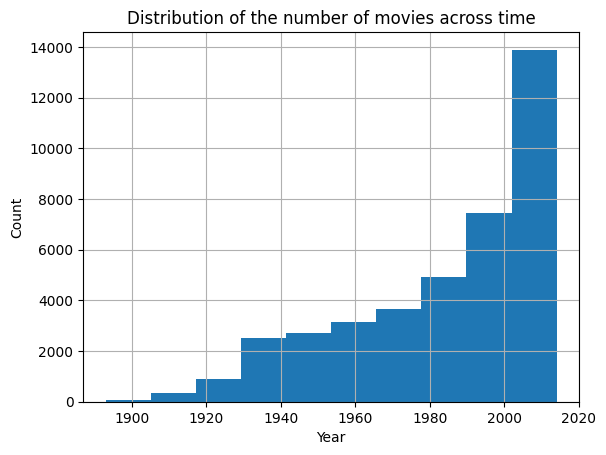

In [13]:
movies_with_year['year'].hist()
plt.title("Distribution of the number of movies across time")
plt.xlabel("Year")
plt.ylabel("Count")

In [14]:
year_thresholds = np.quantile(movies_with_year['year'],[1/3,2/3])
print('We can spit the data in equals group of years by taking years until {}, after {} and between these two.'.format(year_thresholds[0],year_thresholds[1]))

We can spit the data in equals group of years by taking years until 1977.0, after 2002.0 and between these two.


In [15]:
movies_with_year["year"].unique()

array([2001., 1987., 1983., 2002., 1997., 1989., 1986., 1964., 1967.,
       2009., 2007., 1984., 2010., 1999., 1990., 1980., 2008., 2006.,
       1993., 1939., 1976., 1975., 1958., 1995., 1957., 1951., 1968.,
       1996., 2003., 2005., 2011., 1973., 1972., 1956., 1947., 1963.,
       1979., 1954., 1985., 1978., 1936., 2000., 1955., 1998., 1971.,
       1940., 1991., 1974., 1992., 1950., 1910., 1934., 1970., 2004.,
       1948., 1942., 1960., 1932., 1981., 1977., 1927., 1982., 1923.,
       1952., 1994., 1933., 1965., 1962., 1935., 1943., 1966., 1931.,
       1969., 1959., 1928., 2012., 1924., 1916., 1938., 1988., 1953.,
       1930., 1961., 1922., 1937., 1944., 1903., 1915., 1945., 1925.,
       1946., 1949., 1941., 1929., 1914., 1921., 1926., 1920., 1902.,
       1919., 2013., 1911., 1918., 1917., 1900., 1909., 1904., 1913.,
       1898., 1907., 1895., 1912., 1897., 1901., 1908., 1896., 1893.,
       2014., 1905., 1906., 1894., 1899.])

### 5.1.1 Topics over time

In [16]:
movies_with_year["BERT"].unique()

array([ 4, -1,  7,  3,  2,  5, 34,  0, 12, 31,  1, 26, 41, 13,  6, 18, 28,
       19, 24, 14, 11, 43, 35, 30, 15, 16, 33, 22, 17, 20, 10, 44, 46,  8,
       42, 27, 40, 37, 25, 29, 21, 38, 23, 49, 36, 47, 48, 32,  9, 45, 39])

In [17]:
BERT_over_years = pd.DataFrame(index = movies_with_year["year"].unique())
BERT_over_years.head()

Empty DataFrame
Columns: []
Index: [2001.0, 1987.0, 1983.0, 2002.0, 1997.0]

In [18]:
topics=movies_with_year["BERT"].unique()

for topic in topics:
    BERT_over_years['{}'.format(topic)]= movies_with_year[movies_with_year.BERT==topic].groupby(["year"]).size()

In [19]:
BERT_over_years.head()

4     -1     7     3    2    5   34     0    12   31  ...   38  \
2001.0  16.0  658.0  20.0  11.0  3.0  9.0  4.0  10.0   7.0  NaN  ...  3.0   
1987.0   9.0  405.0   5.0   7.0  7.0  4.0  NaN   4.0   NaN  NaN  ...  1.0   
1983.0   7.0  285.0   7.0   6.0  6.0  3.0  2.0   4.0   NaN  NaN  ...  NaN   
2002.0  13.0  759.0  21.0   4.0  7.0  7.0  1.0  10.0  15.0  2.0  ...  NaN   
1997.0  11.0  542.0  15.0   8.0  4.0  8.0  NaN   8.0   3.0  1.0  ...  1.0   

         23   49   36   47   48   32    9   45   39  
2001.0  5.0  1.0  NaN  3.0  1.0  NaN  2.0  1.0  NaN  
1987.0  NaN  NaN  1.0  NaN  NaN  3.0  1.0  NaN  NaN  
1983.0  3.0  1.0  NaN  2.0  1.0  NaN  NaN  1.0  NaN  
2002.0  1.0  1.0  NaN  1.0  2.0  1.0  1.0  NaN  NaN  
1997.0  1.0  NaN  1.0  2.0  1.0  1.0  NaN  NaN  1.0  

[5 rows x 51 columns]

In [21]:
BERT_over_years = BERT_over_years.replace(np.nan, 0)

In [22]:
#Check
print(len(movies_with_year[movies_with_year.Topic==7][movies_with_year.year==2001.0]))
print(len(movies_with_year[movies_with_year.Topic==7][movies_with_year.year==1983.0]))
print(len(movies_with_year[movies_with_year.Topic==0][movies_with_year.year==1997.0]))

31
16
3


/var/folders/8x/2ggqc7_j2m57wss0wl9ckm1h0000gn/T/ipykernel_27272/2485306449.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(len(movies_with_year[movies_with_year.Topic==7][movies_with_year.year==2001.0]))
/var/folders/8x/2ggqc7_j2m57wss0wl9ckm1h0000gn/T/ipykernel_27272/2485306449.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(len(movies_with_year[movies_with_year.Topic==7][movies_with_year.year==1983.0]))
/var/folders/8x/2ggqc7_j2m57wss0wl9ckm1h0000gn/T/ipykernel_27272/2485306449.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(len(movies_with_year[movies_with_year.Topic==0][movies_with_year.year==1997.0]))


In [23]:
#to proportions
BERT_over_years = BERT_over_years.div(BERT_over_years.sum(axis=1), axis=0)
BERT_over_years.head()

4        -1         7         3         2         5        34  \
2001.0  0.019070  0.784267  0.023838  0.013111  0.003576  0.010727  0.004768   
1987.0  0.018036  0.811623  0.010020  0.014028  0.014028  0.008016  0.000000   
1983.0  0.019126  0.778689  0.019126  0.016393  0.016393  0.008197  0.005464   
2002.0  0.013728  0.801478  0.022175  0.004224  0.007392  0.007392  0.001056   
1997.0  0.016492  0.812594  0.022489  0.011994  0.005997  0.011994  0.000000   

               0        12        31  ...        38        23        49  \
2001.0  0.011919  0.008343  0.000000  ...  0.003576  0.005959  0.001192   
1987.0  0.008016  0.000000  0.000000  ...  0.002004  0.000000  0.000000   
1983.0  0.010929  0.000000  0.000000  ...  0.000000  0.008197  0.002732   
2002.0  0.010560  0.015839  0.002112  ...  0.000000  0.001056  0.001056   
1997.0  0.011994  0.004498  0.001499  ...  0.001499  0.001499  0.000000   

              36        47        48        32         9        45        39  
2001.0  0.000000  0.003576  0.001192  0.000000  0.002384  0.001192  0.000000  
1987.0  0.002004  0.000000  0.000000  0.006012  0.002004  0.000000  0.000000  
1983.0  0.000000  0.005464  0.002732  0.000000  0.000000  0.002732  0.000000  
2002.0  0.000000  0.001056  0.002112  0.001056  0.001056  0.000000  0.000000  
1997.0  0.001499  0.002999  0.001499  0.001499  0.000000  0.000000  0.001499  

[5 rows x 51 columns]

In [24]:
t1_BERT = BERT_over_years[BERT_over_years.index <= year_thresholds[0]]
pd.DataFrame(np.array(t1_BERT.index)).describe()

0
count    85.000000
mean   1935.000000
std      24.681302
min    1893.000000
25%    1914.000000
50%    1935.000000
75%    1956.000000
max    1977.000000

In [25]:
t2_BERT = BERT_over_years[(BERT_over_years.index > year_thresholds[0]) & (BERT_over_years.index <= year_thresholds[1])]
pd.DataFrame(np.array(t2_BERT.index)).describe()

0
count    25.000000
mean   1990.000000
std       7.359801
min    1978.000000
25%    1984.000000
50%    1990.000000
75%    1996.000000
max    2002.000000

In [26]:
t3_BERT = BERT_over_years[BERT_over_years.index > year_thresholds[1]]
pd.DataFrame(np.array(t3_BERT.index)).describe()

0
count    12.000000
mean   2008.500000
std       3.605551
min    2003.000000
25%    2005.750000
50%    2008.500000
75%    2011.250000
max    2014.000000

In [27]:
t3_BERT.head()

4        -1         7         3         2         5        34  \
2009.0  0.018614  0.820924  0.019255  0.010911  0.003209  0.007702  0.001926   
2007.0  0.009830  0.813237  0.022280  0.017693  0.007208  0.005242  0.003277   
2010.0  0.016012  0.790393  0.024017  0.008734  0.005095  0.013828  0.002183   
2008.0  0.009913  0.812887  0.021066  0.007435  0.008055  0.006196  0.001859   
2006.0  0.013098  0.798952  0.020956  0.009168  0.006549  0.012443  0.001965   

               0        12        31  ...        38        23        49  \
2009.0  0.005135  0.016688  0.001926  ...  0.001926  0.001926  0.001284   
2007.0  0.015727  0.015072  0.002621  ...  0.000655  0.001311  0.000655   
2010.0  0.012373  0.020378  0.006550  ...  0.000000  0.001456  0.001456   
2008.0  0.011772  0.013631  0.003717  ...  0.001859  0.001239  0.003098   
2006.0  0.007859  0.017682  0.003274  ...  0.003274  0.001310  0.002620   

              36        47        48        32         9        45        39  
2009.0  0.000000  0.001926  0.001284  0.002567  0.000642  0.000642  0.000642  
2007.0  0.000000  0.000000  0.000655  0.003277  0.001966  0.000000  0.000000  
2010.0  0.001456  0.002183  0.001456  0.002183  0.000000  0.000000  0.000728  
2008.0  0.001859  0.001239  0.003098  0.002478  0.001859  0.001239  0.001239  
2006.0  0.000655  0.000655  0.001310  0.003274  0.000000  0.000655  0.000655  

[5 rows x 51 columns]

In [28]:
#One way ANOVA non parametric

print('TOPICS OVER TIME')

for topic in topics:
    print('--------------------------------------------------------------------------------------------------------------')
    Kruskal = kruskal(t1_BERT['{}'.format(topic)],t2_BERT['{}'.format(topic)],t3_BERT['{}'.format(topic)])
    print("For topic {}, Kruskal results are: {}".format(topic,Kruskal))
    if (Kruskal.pvalue < 0.05):
        multiple_test = sp.posthoc_dunn([t1_BERT['{}'.format(topic)],t2_BERT['{}'.format(4)],t3_BERT['{}'.format(topic)]], p_adjust='bonferroni')
        if (multiple_test[1][3] < 0.05):
            if(t1_BERT['{}'.format(topic)].mean() < t3_BERT['{}'.format(topic)].mean()):
                print('There is a significative increase of topic {} proportion form t1 to t3 (pvalue={})'.format(topic,multiple_test[1][3]))
            else:
                print('There is a significative decrease of topic {} proportion form t1 to t3 (pvalue={})'.format(topic,multiple_test[1][3]))      
        if (multiple_test[1][2] < 0.05):
            if(t1_BERT['{}'.format(topic)].mean() < t2_BERT['{}'.format(topic)].mean()):
                print('There is a significative increase of topic {} proportion form t1 to t2 (pvalue={})'.format(topic,multiple_test[1][2]))
            else:
                print('There is a significative decrease of topic {} proportion form t1 to t2 (pvalue={})'.format(topic,multiple_test[1][2])) 
        if (multiple_test[2][3] < 0.05):
            if(t2_BERT['{}'.format(topic)].mean() < t3_BERT['{}'.format(topic)].mean()):
                print('There is a significative increase of topic {} proportion form t2 to t3 (pvalue={})'.format(topic,multiple_test[2][3]))
            else:
                print('There is a significative decrease of topic {} proportion form t2 to t3 (pvalue={})'.format(topic,multiple_test[2][3]))     

TOPICS OVER TIME
--------------------------------------------------------------------------------------------------------------
For topic 4, Kruskal results are: KruskalResult(statistic=36.85132174573728, pvalue=9.9503225136541e-09)
There is a significative increase of topic 4 proportion form t1 to t3 (pvalue=0.00928097743925846)
There is a significative increase of topic 4 proportion form t1 to t2 (pvalue=3.159721450313295e-08)
--------------------------------------------------------------------------------------------------------------
For topic -1, Kruskal results are: KruskalResult(statistic=5.189280334223725, pvalue=0.07467274094875376)
--------------------------------------------------------------------------------------------------------------
For topic 7, Kruskal results are: KruskalResult(statistic=31.752734641259583, pvalue=1.2734481885678688e-07)
There is a significative increase of topic 7 proportion form t1 to t3 (pvalue=0.00044356784295542927)
There is a significative inc

In [29]:
# Not sure to keep it
for topic in topics:
    #fields slope, intercept, rvalue, pvalue and stderr
    #The p-value for a hypothesis test whose null hypothesis is that the slope is zero, 
    #using Wald Test with t-distribution of the test statistic. 
    slope, intercept, r, p, se = linregress(BERT_over_years.index, BERT_over_years['{}'.format(topic)])
    print("For topic {}, linear regression slope is {}, with a pvalue {}.".format(topic,slope, p))
    

For topic 4, linear regression slope is 0.00015915302539587495, with a pvalue 0.11431255439924387.
For topic -1, linear regression slope is 8.039966019182283e-05, with a pvalue 0.7696125620058352.
For topic 7, linear regression slope is 0.0002092676171961734, with a pvalue 4.876478555094412e-24.
For topic 3, linear regression slope is 9.762919468357969e-06, with a pvalue 0.8172109823501635.
For topic 2, linear regression slope is -0.00028870013287572087, with a pvalue 0.0011162779075828766.
For topic 5, linear regression slope is -0.00015953175500634932, with a pvalue 0.057532842576927104.
For topic 34, linear regression slope is 2.2825349598715675e-05, with a pvalue 0.00011885936556994925.
For topic 0, linear regression slope is 0.00011443649409881725, with a pvalue 8.331584788117843e-20.
For topic 12, linear regression slope is 7.545526401826615e-05, with a pvalue 8.283707917293535e-12.
For topic 31, linear regression slope is 1.389129343658782e-05, with a pvalue 0.000489511358143766

---

### 5.1.2 Sentiments over time

#### 5.1.2.1 Compound

In [30]:
# Ordinary Least Squares Linear Regression 

mod = smf.ols(formula='compound_score ~ year', data=movies_with_year)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:         compound_score   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     8.997
Date:                Sun, 18 Dec 2022   Prob (F-statistic):            0.00271
Time:                        15:48:27   Log-Likelihood:                -47013.
No. Observations:               39564   AIC:                         9.403e+04
Df Residuals:                   39562   BIC:                         9.405e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7325      0.309      2.373      0.0

#### 5.1.2.2 All sentiments

In [31]:
t1_movies_with_year = movies_with_year[movies_with_year.year <= year_thresholds[0]]
print("Length of t1 dataset: {}".format(len(t1_movies_with_year)))

Length of t1 dataset: 13315


In [32]:
t2_movies_with_year = movies_with_year[(movies_with_year.year > year_thresholds[0]) & (movies_with_year.year <= year_thresholds[1])]
print("Length of t2 dataset: {}".format(len(t2_movies_with_year)))

Length of t2 dataset: 13305


In [33]:
t3_movies_with_year = movies_with_year[movies_with_year.year > year_thresholds[1]]
print("Length of t3 dataset: {}".format(len(t3_movies_with_year)))

Length of t3 dataset: 12944


In [34]:
# One way ANOVA 

print('SENTIMENTS OVER TIME')
sentiments=['positive_score', 'negative_score', 'neutral_score',
        'multi_fear', 'multi_anger', 'multi_trust',
       'multi_surprise', 'multi_sadness', 'multi_disgust', 'multi_joy',
       'multi_anticipation']

for sentiment in sentiments:
    print('--------------------------------------------------------------------------------------------------------------')
    Anova = f_oneway(t1_movies_with_year['{}'.format(sentiment)],t2_movies_with_year['{}'.format(sentiment)],t3_movies_with_year['{}'.format(sentiment)])
    print("For {}, ANOVA results are: {}".format(sentiment,Anova))
    if (Anova.pvalue < 0.05):
        multiple_test = sp.posthoc_tukey([t1_movies_with_year['{}'.format(sentiment)],t2_movies_with_year['{}'.format(sentiment)],t3_movies_with_year['{}'.format(sentiment)]])
        if (multiple_test[1][3] < 0.05):
            if(t1_movies_with_year['{}'.format(sentiment)].mean() < t3_movies_with_year['{}'.format(sentiment)].mean()):
                print('There is a significative increase of {} proportion form t1 to t3 (pvalue={})'.format(sentiment,multiple_test[1][3]))
            else:
                print('There is a significative decrease of {} proportion form t1 to t3 (pvalue={})'.format(sentiment,multiple_test[1][3]))      
        if (multiple_test[1][2] < 0.05):
            if(t1_movies_with_year['{}'.format(sentiment)].mean() < t2_movies_with_year['{}'.format(sentiment)].mean()):
                print('There is a significative increase of {} proportion form t1 to t2 (pvalue={})'.format(sentiment,multiple_test[1][2]))
            else:
                print('There is a significative decrease of {} proportion form t1 to t2 (pvalue={})'.format(sentiment,multiple_test[1][2])) 
        if (multiple_test[2][3] < 0.05):
            if(t2_movies_with_year['{}'.format(sentiment)].mean() < t3_movies_with_year['{}'.format(sentiment)].mean()):
                print('There is a significative increase of {} proportion form t2 to t3 (pvalue={})'.format(sentiment,multiple_test[2][3]))
            else:
                print('There is a significative decrease of {} proportion form t2 to t3 (pvalue={})'.format(sentiment,multiple_test[2][3]))     

SENTIMENTS OVER TIME
--------------------------------------------------------------------------------------------------------------
For positive_score, ANOVA results are: F_onewayResult(statistic=20.858638992727418, pvalue=8.830414739745978e-10)
There is a significative increase of positive_score proportion form t1 to t3 (pvalue=0.001)
There is a significative increase of positive_score proportion form t2 to t3 (pvalue=0.001)
--------------------------------------------------------------------------------------------------------------
For negative_score, ANOVA results are: F_onewayResult(statistic=33.842542999566184, pvalue=2.06504309000563e-15)
There is a significative decrease of negative_score proportion form t1 to t3 (pvalue=0.02674846515790663)
There is a significative increase of negative_score proportion form t1 to t2 (pvalue=0.001)
There is a significative decrease of negative_score proportion form t2 to t3 (pvalue=0.001)
--------------------------------------------------------

### 5.1.3 Concern categories over time

In [35]:
# One way ANOVA 

print('CONCERNS OVER TIME')
concerns=['ecological_concern',
       'health_concern', 'conflict_concern', 'technological_concern',
       'space_concern', 'gender_inequality_concern', 'homophobia_concern',
       'racism_concern', 'mental_concern', 'relationships_concern']

for concern in concerns:
    print('--------------------------------------------------------------------------------------------------------------')
    Anova = f_oneway(t1_movies_with_year['{}'.format(concern)],t2_movies_with_year['{}'.format(concern)],t3_movies_with_year['{}'.format(concern)])
    print("For {}, ANOVA results are: {}".format(concern,Anova))
    if (Anova.pvalue < 0.05):
        multiple_test = sp.posthoc_tukey([t1_movies_with_year['{}'.format(concern)],t2_movies_with_year['{}'.format(concern)],t3_movies_with_year['{}'.format(concern)]])
        if (multiple_test[1][3] < 0.05):
            if(t1_movies_with_year['{}'.format(concern)].mean() < t3_movies_with_year['{}'.format(concern)].mean()):
                print('There is a significative increase of {} proportion form t1 to t3 (pvalue={})'.format(concern,multiple_test[1][3]))
            else:
                print('There is a significative decrease of {} proportion form t1 to t3 (pvalue={})'.format(concern,multiple_test[1][3]))      
        if (multiple_test[1][2] < 0.05):
            if(t1_movies_with_year['{}'.format(concern)].mean() < t2_movies_with_year['{}'.format(concern)].mean()):
                print('There is a significative increase of {} proportion form t1 to t2 (pvalue={})'.format(concern,multiple_test[1][2]))
            else:
                print('There is a significative decrease of {} proportion form t1 to t2 (pvalue={})'.format(concern,multiple_test[1][2])) 
        if (multiple_test[2][3] < 0.05):
            if(t2_movies_with_year['{}'.format(concern)].mean() < t3_movies_with_year['{}'.format(concern)].mean()):
                print('There is a significative increase of {} proportion form t2 to t3 (pvalue={})'.format(concern,multiple_test[2][3]))
            else:
                print('There is a significative decrease of {} proportion form t2 to t3 (pvalue={})'.format(concern,multiple_test[2][3]))     

CONCERNS OVER TIME
--------------------------------------------------------------------------------------------------------------
For ecological_concern, ANOVA results are: F_onewayResult(statistic=11.489597937662818, pvalue=1.0270217712814192e-05)
There is a significative increase of ecological_concern proportion form t1 to t3 (pvalue=0.001)
There is a significative increase of ecological_concern proportion form t1 to t2 (pvalue=0.003015003596582244)
--------------------------------------------------------------------------------------------------------------
For health_concern, ANOVA results are: F_onewayResult(statistic=9.567123633853834, pvalue=7.015449047086728e-05)
There is a significative increase of health_concern proportion form t1 to t3 (pvalue=0.001)
There is a significative increase of health_concern proportion form t2 to t3 (pvalue=0.008277373300415891)
--------------------------------------------------------------------------------------------------------------
For confli

## 5.2 Overall

### 5.2.1 Sentiments

#### 5.2.1.1 During the whole period

In [36]:
corr_sentiments=movies[sentiments].corr(method='pearson')
corr_sentiments.style.background_gradient(cmap='coolwarm').set_precision(2)

/var/folders/8x/2ggqc7_j2m57wss0wl9ckm1h0000gn/T/ipykernel_27272/1497738886.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr_sentiments.style.background_gradient(cmap='coolwarm').set_precision(2)


In [37]:
# One way ANOVA 

print('OVERALL SENTIMENTS')

print('--------------------------------------------------------------------------------------------------------------')
Anova = f_oneway(movies['positive_score'], movies['negative_score'], movies['neutral_score'],
        movies['multi_fear'], movies['multi_anger'], movies['multi_trust'],
       movies['multi_surprise'], movies['multi_sadness'], movies['multi_disgust'], movies['multi_joy'],
       movies['multi_anticipation'])
print("For all sentiments, ANOVA results are: {}".format(Anova))


OVERALL SENTIMENTS
--------------------------------------------------------------------------------------------------------------
For all sentiments, ANOVA results are: F_onewayResult(statistic=624400.4027066946, pvalue=0.0)


In [38]:
multiple_test = sp.posthoc_tukey([movies['positive_score'], movies['negative_score'], movies['neutral_score'],
        movies['multi_fear'], movies['multi_anger'], movies['multi_trust'],
       movies['multi_surprise'], movies['multi_sadness'], movies['multi_disgust'], movies['multi_joy'],
       movies['multi_anticipation']])
print("Table of adjusted pvalues from multiple comparisons:")
multiple_test     

Table of adjusted pvalues from multiple comparisons:


1      2      3      4      5      6      7      8      9      10  \
1   1.000  0.001  0.001  0.001  0.001  0.001  0.001  0.001  0.001  0.001   
2   0.001  1.000  0.001  0.001  0.001  0.001  0.001  0.001  0.001  0.001   
3   0.001  0.001  1.000  0.001  0.001  0.001  0.001  0.001  0.001  0.001   
4   0.001  0.001  0.001  1.000  0.001  0.001  0.001  0.001  0.001  0.001   
5   0.001  0.001  0.001  0.001  1.000  0.001  0.001  0.001  0.001  0.001   
6   0.001  0.001  0.001  0.001  0.001  1.000  0.001  0.001  0.001  0.001   
7   0.001  0.001  0.001  0.001  0.001  0.001  1.000  0.001  0.001  0.001   
8   0.001  0.001  0.001  0.001  0.001  0.001  0.001  1.000  0.001  0.001   
9   0.001  0.001  0.001  0.001  0.001  0.001  0.001  0.001  1.000  0.001   
10  0.001  0.001  0.001  0.001  0.001  0.001  0.001  0.001  0.001  1.000   
11  0.001  0.001  0.001  0.001  0.001  0.001  0.001  0.001  0.001  0.001   

       11  
1   0.001  
2   0.001  
3   0.001  
4   0.001  
5   0.001  
6   0.001  
7   0.001  
8   0.001  
9   0.001  
10  0.001  
11  1.000

(<AxesSubplot: >, <matplotlib.colorbar.Colorbar at 0x7fbb221f85e0>)

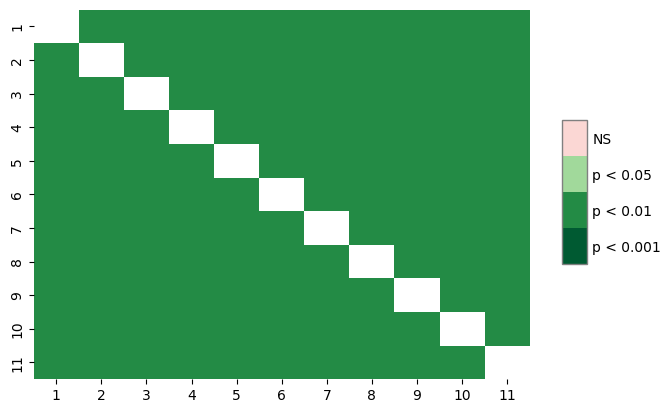

In [39]:
sp.sign_plot(multiple_test)

All sentiment scores are significatively different, so we can order them by mean.

In [181]:
movies[sentiments].mean().sort_values(ascending=False)

neutral_score         0.803855
multi_trust           0.122282
negative_score        0.107057
multi_fear            0.104090
multi_anticipation    0.097933
positive_score        0.089083
multi_joy             0.083745
multi_sadness         0.075277
multi_anger           0.072954
multi_surprise        0.052684
multi_disgust         0.041020
dtype: float64

#### 5.2.1.2 During t1

In [40]:
corr_sentiments=t1_movies_with_year[sentiments].corr(method='pearson')
corr_sentiments.style.background_gradient(cmap='coolwarm').set_precision(2)

/var/folders/8x/2ggqc7_j2m57wss0wl9ckm1h0000gn/T/ipykernel_27272/692957772.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr_sentiments.style.background_gradient(cmap='coolwarm').set_precision(2)


In [41]:
# One way ANOVA 

print('SENTIMENTS DURING T1')

print('--------------------------------------------------------------------------------------------------------------')
Anova = f_oneway(t1_movies_with_year['positive_score'], t1_movies_with_year['negative_score'], t1_movies_with_year['neutral_score'],
        t1_movies_with_year['multi_fear'], t1_movies_with_year['multi_anger'], t1_movies_with_year['multi_trust'],
       t1_movies_with_year['multi_surprise'], t1_movies_with_year['multi_sadness'], t1_movies_with_year['multi_disgust'], t1_movies_with_year['multi_joy'],
       t1_movies_with_year['multi_anticipation'])
print("For all sentiments, ANOVA results are: {}".format(Anova))


SENTIMENTS DURING T1
--------------------------------------------------------------------------------------------------------------
For all sentiments, ANOVA results are: F_onewayResult(statistic=188309.3092765134, pvalue=0.0)


In [42]:
multiple_test = sp.posthoc_tukey([t1_movies_with_year['positive_score'], t1_movies_with_year['negative_score'], t1_movies_with_year['neutral_score'],
        t1_movies_with_year['multi_fear'], t1_movies_with_year['multi_anger'], t1_movies_with_year['multi_trust'],
       t1_movies_with_year['multi_surprise'], t1_movies_with_year['multi_sadness'], t1_movies_with_year['multi_disgust'], t1_movies_with_year['multi_joy'],
       t1_movies_with_year['multi_anticipation']])
print("Table of adjusted pvalues from multiple comparisons:")
multiple_test     

Table of adjusted pvalues from multiple comparisons:


1         2      3         4      5      6      7      8      9   \
1   1.000  0.001000  0.001  0.001000  0.001  0.001  0.001  0.001  0.001   
2   0.001  1.000000  0.001  0.837551  0.001  0.001  0.001  0.001  0.001   
3   0.001  0.001000  1.000  0.001000  0.001  0.001  0.001  0.001  0.001   
4   0.001  0.837551  0.001  1.000000  0.001  0.001  0.001  0.001  0.001   
5   0.001  0.001000  0.001  0.001000  1.000  0.001  0.001  0.001  0.001   
6   0.001  0.001000  0.001  0.001000  0.001  1.000  0.001  0.001  0.001   
7   0.001  0.001000  0.001  0.001000  0.001  0.001  1.000  0.001  0.001   
8   0.001  0.001000  0.001  0.001000  0.001  0.001  0.001  1.000  0.001   
9   0.001  0.001000  0.001  0.001000  0.001  0.001  0.001  0.001  1.000   
10  0.001  0.001000  0.001  0.001000  0.001  0.001  0.001  0.001  0.001   
11  0.001  0.001000  0.001  0.001000  0.001  0.001  0.001  0.001  0.001   

       10     11  
1   0.001  0.001  
2   0.001  0.001  
3   0.001  0.001  
4   0.001  0.001  
5   0.001  0.001  
6   0.001  0.001  
7   0.001  0.001  
8   0.001  0.001  
9   0.001  0.001  
10  1.000  0.001  
11  0.001  1.000

(<AxesSubplot: >, <matplotlib.colorbar.Colorbar at 0x7fbb22a9c670>)

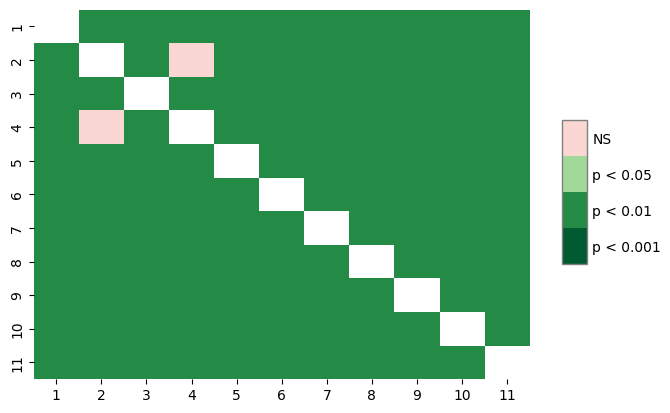

In [43]:
sp.sign_plot(multiple_test)

During t1 period, all sentiment scores are significatively different, except for fear and negative sentiment, so we can order them by mean.

In [44]:
t1_movies_with_year[sentiments].mean().sort_values(ascending=False)

neutral_score         0.805294
multi_trust           0.120546
negative_score        0.106892
multi_fear            0.105706
multi_anticipation    0.095647
positive_score        0.087808
multi_joy             0.081486
multi_anger           0.076612
multi_sadness         0.072550
multi_surprise        0.053609
multi_disgust         0.041994
dtype: float64

#### 5.2.1.3 During t2

In [45]:
corr_sentiments=t2_movies_with_year[sentiments].corr(method='pearson')
corr_sentiments.style.background_gradient(cmap='coolwarm').set_precision(2)

/var/folders/8x/2ggqc7_j2m57wss0wl9ckm1h0000gn/T/ipykernel_27272/4228981669.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr_sentiments.style.background_gradient(cmap='coolwarm').set_precision(2)


In [46]:
# One way ANOVA

print('SENTIMENTS DURING T2')

print('--------------------------------------------------------------------------------------------------------------')
Anova = f_oneway(t2_movies_with_year['positive_score'], t2_movies_with_year['negative_score'], t2_movies_with_year['neutral_score'],
        t2_movies_with_year['multi_fear'], t2_movies_with_year['multi_anger'], t2_movies_with_year['multi_trust'],
       t2_movies_with_year['multi_surprise'], t2_movies_with_year['multi_sadness'], t2_movies_with_year['multi_disgust'], t2_movies_with_year['multi_joy'],
       t2_movies_with_year['multi_anticipation'])
print("For all sentiments, ANOVA results are: {}".format(Anova))


SENTIMENTS DURING T2
--------------------------------------------------------------------------------------------------------------
For all sentiments, ANOVA results are: F_onewayResult(statistic=211024.30511171272, pvalue=0.0)


In [47]:
multiple_test = sp.posthoc_tukey([t2_movies_with_year['positive_score'], t2_movies_with_year['negative_score'], t2_movies_with_year['neutral_score'],
        t2_movies_with_year['multi_fear'], t2_movies_with_year['multi_anger'], t2_movies_with_year['multi_trust'],
       t2_movies_with_year['multi_surprise'], t2_movies_with_year['multi_sadness'], t2_movies_with_year['multi_disgust'], t2_movies_with_year['multi_joy'],
       t2_movies_with_year['multi_anticipation']])
print("Table of adjusted pvalues from multiple comparisons:")
multiple_test     

Table of adjusted pvalues from multiple comparisons:


1      2      3      4      5      6      7      8      9      10  \
1   1.000  0.001  0.001  0.001  0.001  0.001  0.001  0.001  0.001  0.001   
2   0.001  1.000  0.001  0.001  0.001  0.001  0.001  0.001  0.001  0.001   
3   0.001  0.001  1.000  0.001  0.001  0.001  0.001  0.001  0.001  0.001   
4   0.001  0.001  0.001  1.000  0.001  0.001  0.001  0.001  0.001  0.001   
5   0.001  0.001  0.001  0.001  1.000  0.001  0.001  0.001  0.001  0.001   
6   0.001  0.001  0.001  0.001  0.001  1.000  0.001  0.001  0.001  0.001   
7   0.001  0.001  0.001  0.001  0.001  0.001  1.000  0.001  0.001  0.001   
8   0.001  0.001  0.001  0.001  0.001  0.001  0.001  1.000  0.001  0.001   
9   0.001  0.001  0.001  0.001  0.001  0.001  0.001  0.001  1.000  0.001   
10  0.001  0.001  0.001  0.001  0.001  0.001  0.001  0.001  0.001  1.000   
11  0.001  0.001  0.001  0.001  0.001  0.001  0.001  0.001  0.001  0.001   

       11  
1   0.001  
2   0.001  
3   0.001  
4   0.001  
5   0.001  
6   0.001  
7   0.001  
8   0.001  
9   0.001  
10  0.001  
11  1.000

(<AxesSubplot: >, <matplotlib.colorbar.Colorbar at 0x7fbb22817700>)

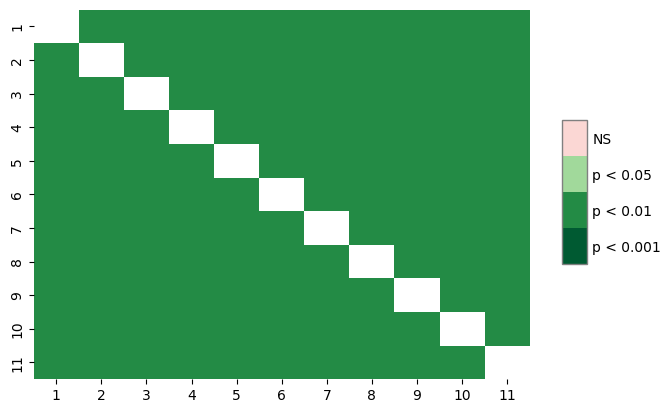

In [48]:
sp.sign_plot(multiple_test)

During t2 period, all sentiment scores are significatively different, so we can order them by mean.

In [49]:
t2_movies_with_year[sentiments].mean().sort_values(ascending=False)

neutral_score         0.801174
multi_trust           0.122038
negative_score        0.111033
multi_fear            0.105886
multi_anticipation    0.097053
positive_score        0.087791
multi_joy             0.082101
multi_sadness         0.077315
multi_anger           0.074067
multi_surprise        0.051448
multi_disgust         0.042229
dtype: float64

#### 5.2.1.4 During t3

In [50]:
corr_sentiments=t3_movies_with_year[sentiments].corr(method='pearson')
corr_sentiments.style.background_gradient(cmap='coolwarm').set_precision(2)

/var/folders/8x/2ggqc7_j2m57wss0wl9ckm1h0000gn/T/ipykernel_27272/3732060515.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr_sentiments.style.background_gradient(cmap='coolwarm').set_precision(2)


In [51]:
# One way ANOVA

print('SENTIMENTS DURING T3')

print('--------------------------------------------------------------------------------------------------------------')
Anova = f_oneway(t3_movies_with_year['positive_score'], t3_movies_with_year['negative_score'], t3_movies_with_year['neutral_score'],
        t3_movies_with_year['multi_fear'], t3_movies_with_year['multi_anger'], t3_movies_with_year['multi_trust'],
       t3_movies_with_year['multi_surprise'], t3_movies_with_year['multi_sadness'], t3_movies_with_year['multi_disgust'], t3_movies_with_year['multi_joy'],
       t3_movies_with_year['multi_anticipation'])
print("For all sentiments, ANOVA results are: {}".format(Anova))


SENTIMENTS DURING T3
--------------------------------------------------------------------------------------------------------------
For all sentiments, ANOVA results are: F_onewayResult(statistic=197924.1588601634, pvalue=0.0)


In [52]:
multiple_test = sp.posthoc_tukey([t3_movies_with_year['positive_score'], t3_movies_with_year['negative_score'], t3_movies_with_year['neutral_score'],
        t3_movies_with_year['multi_fear'], t3_movies_with_year['multi_anger'], t3_movies_with_year['multi_trust'],
       t3_movies_with_year['multi_surprise'], t3_movies_with_year['multi_sadness'], t3_movies_with_year['multi_disgust'], t3_movies_with_year['multi_joy'],
       t3_movies_with_year['multi_anticipation']])
print("Table of adjusted pvalues from multiple comparisons:")
multiple_test     

Table of adjusted pvalues from multiple comparisons:


1      2      3      4      5      6      7      8      9      10  \
1   1.000  0.001  0.001  0.001  0.001  0.001  0.001  0.001  0.001  0.001   
2   0.001  1.000  0.001  0.001  0.001  0.001  0.001  0.001  0.001  0.001   
3   0.001  0.001  1.000  0.001  0.001  0.001  0.001  0.001  0.001  0.001   
4   0.001  0.001  0.001  1.000  0.001  0.001  0.001  0.001  0.001  0.001   
5   0.001  0.001  0.001  0.001  1.000  0.001  0.001  0.001  0.001  0.001   
6   0.001  0.001  0.001  0.001  0.001  1.000  0.001  0.001  0.001  0.001   
7   0.001  0.001  0.001  0.001  0.001  0.001  1.000  0.001  0.001  0.001   
8   0.001  0.001  0.001  0.001  0.001  0.001  0.001  1.000  0.001  0.001   
9   0.001  0.001  0.001  0.001  0.001  0.001  0.001  0.001  1.000  0.001   
10  0.001  0.001  0.001  0.001  0.001  0.001  0.001  0.001  0.001  1.000   
11  0.001  0.001  0.001  0.900  0.001  0.001  0.001  0.001  0.001  0.001   

       11  
1   0.001  
2   0.001  
3   0.001  
4   0.900  
5   0.001  
6   0.001  
7   0.001  
8   0.001  
9   0.001  
10  0.001  
11  1.000

(<AxesSubplot: >, <matplotlib.colorbar.Colorbar at 0x7fbb2418f640>)

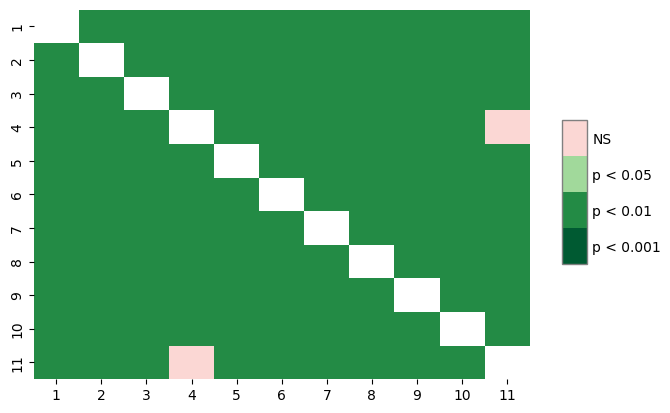

In [54]:
sp.sign_plot(multiple_test)

During t3 period, all sentiment scores are significatively different, except for fear and anticipation, so we can order them by mean.

In [55]:
t3_movies_with_year[sentiments].mean().sort_values(ascending=False)

neutral_score         0.803563
multi_trust           0.124430
negative_score        0.104936
multi_fear            0.101724
multi_anticipation    0.100766
positive_score        0.091492
multi_joy             0.087170
multi_sadness         0.076760
multi_anger           0.068842
multi_surprise        0.052557
multi_disgust         0.039068
dtype: float64

### 5.2.2 Concern categories

#### 5.2.2.1 During the whole period

In [56]:
corr_concerns=movies[concerns].corr(method='pearson')
corr_concerns.style.background_gradient(cmap='coolwarm').set_precision(2)

/var/folders/8x/2ggqc7_j2m57wss0wl9ckm1h0000gn/T/ipykernel_27272/2603773519.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr_concerns.style.background_gradient(cmap='coolwarm').set_precision(2)


In [57]:
# One way ANOVA

print('OVERALL CONCERNS')

print('--------------------------------------------------------------------------------------------------------------')
Anova = f_oneway(movies['ecological_concern'], movies['health_concern'], movies['conflict_concern'],
        movies['technological_concern'], movies['space_concern'], movies['gender_inequality_concern'],
       movies['homophobia_concern'], movies['racism_concern'], movies['mental_concern'], movies['relationships_concern'])
print("For all concerns, ANOVA results are: {}".format(Anova))


OVERALL CONCERNS
--------------------------------------------------------------------------------------------------------------
For all concerns, ANOVA results are: F_onewayResult(statistic=5816.870202297267, pvalue=0.0)


In [58]:
multiple_test = sp.posthoc_tukey([movies['ecological_concern'], movies['health_concern'], movies['conflict_concern'],
        movies['technological_concern'], movies['space_concern'], movies['gender_inequality_concern'],
       movies['homophobia_concern'], movies['racism_concern'], movies['mental_concern'], movies['relationships_concern']])
print("Table of adjusted pvalues from multiple comparisons:")
multiple_test     

Table of adjusted pvalues from multiple comparisons:


1      2      3         4      5         6         7         8   \
1   1.000000  0.001  0.001  0.105478  0.001  0.723671  0.900000  0.001000   
2   0.001000  1.000  0.001  0.001000  0.900  0.001000  0.001000  0.001000   
3   0.001000  0.001  1.000  0.001000  0.001  0.001000  0.001000  0.001000   
4   0.105478  0.001  0.001  1.000000  0.001  0.900000  0.481004  0.900000   
5   0.001000  0.900  0.001  0.001000  1.000  0.001000  0.001000  0.001000   
6   0.723671  0.001  0.001  0.900000  0.001  1.000000  0.900000  0.292627   
7   0.900000  0.001  0.001  0.481004  0.001  0.900000  1.000000  0.016921   
8   0.001000  0.001  0.001  0.900000  0.001  0.292627  0.016921  1.000000   
9   0.001000  0.001  0.001  0.001000  0.001  0.001000  0.001000  0.001000   
10  0.001000  0.001  0.001  0.001000  0.001  0.001000  0.001000  0.001000   

       9      10  
1   0.001  0.001  
2   0.001  0.001  
3   0.001  0.001  
4   0.001  0.001  
5   0.001  0.001  
6   0.001  0.001  
7   0.001  0.001  
8   0.001  0.001  
9   1.000  0.001  
10  0.001  1.000

(<AxesSubplot: >, <matplotlib.colorbar.Colorbar at 0x7fbb25b3ea90>)

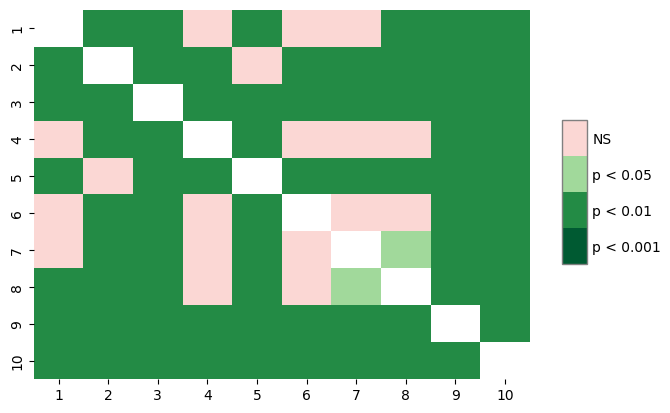

In [59]:
sp.sign_plot(multiple_test)

Ecological concern scores are not significatively different from technological, gender and homophobia concerns scores. Health concern scores are not significatively different from space concern scores. Technological concern scores are not significatively different from ecological, (...)  are significatively different, so we can order them by mean.

In [60]:
movies[concerns].mean().sort_values(ascending=False)

relationships_concern        0.007523
conflict_concern             0.001867
space_concern                0.000986
health_concern               0.000949
mental_concern               0.000598
ecological_concern           0.000306
homophobia_concern           0.000275
gender_inequality_concern    0.000232
technological_concern        0.000185
racism_concern               0.000129
dtype: float64

#### 5.2.2.2 During t1

In [62]:
corr_concerns=t1_movies_with_year[concerns].corr(method='pearson')
corr_concerns.style.background_gradient(cmap='coolwarm').set_precision(2)

/var/folders/8x/2ggqc7_j2m57wss0wl9ckm1h0000gn/T/ipykernel_27272/1478540894.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr_concerns.style.background_gradient(cmap='coolwarm').set_precision(2)


In [63]:
# One way ANOVA 

print('OVERALL CONCERNS DURING T1')

print('--------------------------------------------------------------------------------------------------------------')
Anova = f_oneway(t1_movies_with_year['ecological_concern'], t1_movies_with_year['health_concern'], t1_movies_with_year['conflict_concern'],
        t1_movies_with_year['technological_concern'], t1_movies_with_year['space_concern'], t1_movies_with_year['gender_inequality_concern'],
       t1_movies_with_year['homophobia_concern'], t1_movies_with_year['racism_concern'], t1_movies_with_year['mental_concern'], t1_movies_with_year['relationships_concern'])
print("For all concerns, ANOVA results are: {}".format(Anova))


OVERALL CONCERNS DURING T1
--------------------------------------------------------------------------------------------------------------
For all concerns, ANOVA results are: F_onewayResult(statistic=1189.297991073259, pvalue=0.0)


In [64]:
multiple_test = sp.posthoc_tukey([t1_movies_with_year['ecological_concern'], t1_movies_with_year['health_concern'], t1_movies_with_year['conflict_concern'],
        t1_movies_with_year['technological_concern'], t1_movies_with_year['space_concern'], t1_movies_with_year['gender_inequality_concern'],
       t1_movies_with_year['homophobia_concern'], t1_movies_with_year['racism_concern'], t1_movies_with_year['mental_concern'], t1_movies_with_year['relationships_concern']])
print("Table of adjusted pvalues from multiple comparisons:")
multiple_test     

Table of adjusted pvalues from multiple comparisons:


1      2      3         4      5         6      7         8   \
1   1.000000  0.001  0.001  0.714043  0.001  0.900000  0.900  0.890606   
2   0.001000  1.000  0.001  0.001000  0.900  0.001000  0.001  0.001000   
3   0.001000  0.001  1.000  0.001000  0.001  0.001000  0.001  0.001000   
4   0.714043  0.001  0.001  1.000000  0.001  0.845758  0.900  0.900000   
5   0.001000  0.900  0.001  0.001000  1.000  0.001000  0.001  0.001000   
6   0.900000  0.001  0.001  0.845758  0.001  1.000000  0.900  0.900000   
7   0.900000  0.001  0.001  0.900000  0.001  0.900000  1.000  0.900000   
8   0.890606  0.001  0.001  0.900000  0.001  0.900000  0.900  1.000000   
9   0.004650  0.001  0.001  0.001000  0.001  0.001967  0.001  0.001000   
10  0.001000  0.001  0.001  0.001000  0.001  0.001000  0.001  0.001000   

          9      10  
1   0.004650  0.001  
2   0.001000  0.001  
3   0.001000  0.001  
4   0.001000  0.001  
5   0.001000  0.001  
6   0.001967  0.001  
7   0.001000  0.001  
8   0.001000  0.001  
9   1.000000  0.001  
10  0.001000  1.000

(<AxesSubplot: >, <matplotlib.colorbar.Colorbar at 0x7fbb2450a190>)

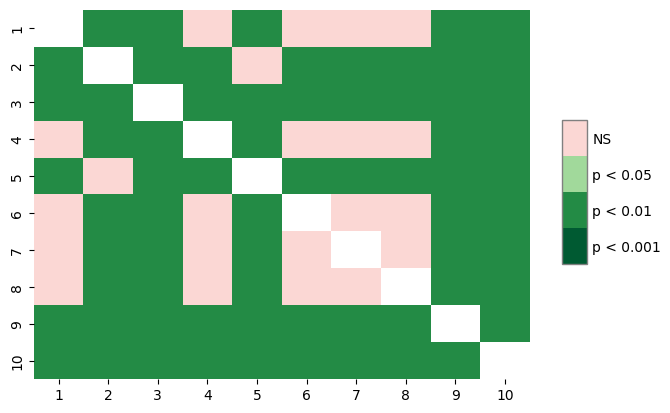

In [65]:
sp.sign_plot(multiple_test)

During t1 period, ...

In [66]:
t1_movies_with_year[concerns].mean().sort_values(ascending=False)

relationships_concern        0.005385
conflict_concern             0.001952
health_concern               0.000847
space_concern                0.000827
mental_concern               0.000471
ecological_concern           0.000213
gender_inequality_concern    0.000198
homophobia_concern           0.000140
racism_concern               0.000112
technological_concern        0.000093
dtype: float64

#### 5.2.2.3 During t2

In [67]:
corr_concerns=t2_movies_with_year[concerns].corr(method='pearson')
corr_concerns.style.background_gradient(cmap='coolwarm').set_precision(2)

/var/folders/8x/2ggqc7_j2m57wss0wl9ckm1h0000gn/T/ipykernel_27272/3431934876.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr_concerns.style.background_gradient(cmap='coolwarm').set_precision(2)


In [68]:
# One way ANOVA 

print('OVERALL CONCERNS DURING T2')

print('--------------------------------------------------------------------------------------------------------------')
Anova = f_oneway(t2_movies_with_year['ecological_concern'], t2_movies_with_year['health_concern'], t2_movies_with_year['conflict_concern'],
        t2_movies_with_year['technological_concern'], t2_movies_with_year['space_concern'], t2_movies_with_year['gender_inequality_concern'],
       t2_movies_with_year['homophobia_concern'], t2_movies_with_year['racism_concern'], t2_movies_with_year['mental_concern'], t2_movies_with_year['relationships_concern'])
print("For all concerns, ANOVA results are: {}".format(Anova))


OVERALL CONCERNS DURING T2
--------------------------------------------------------------------------------------------------------------
For all concerns, ANOVA results are: F_onewayResult(statistic=2113.0784692444186, pvalue=0.0)


In [69]:
multiple_test = sp.posthoc_tukey([t2_movies_with_year['ecological_concern'], t2_movies_with_year['health_concern'], t2_movies_with_year['conflict_concern'],
        t2_movies_with_year['technological_concern'], t2_movies_with_year['space_concern'], t2_movies_with_year['gender_inequality_concern'],
       t2_movies_with_year['homophobia_concern'], t2_movies_with_year['racism_concern'], t2_movies_with_year['mental_concern'], t2_movies_with_year['relationships_concern']])
print("Table of adjusted pvalues from multiple comparisons:")
multiple_test     

Table of adjusted pvalues from multiple comparisons:


1         2      3         4         5         6         7   \
1   1.000000  0.001000  0.001  0.900000  0.001000  0.900000  0.900000   
2   0.001000  1.000000  0.001  0.001000  0.049492  0.001000  0.001000   
3   0.001000  0.001000  1.000  0.001000  0.001000  0.001000  0.001000   
4   0.900000  0.001000  0.001  1.000000  0.001000  0.900000  0.844886   
5   0.001000  0.049492  0.001  0.001000  1.000000  0.001000  0.001000   
6   0.900000  0.001000  0.001  0.900000  0.001000  1.000000  0.900000   
7   0.900000  0.001000  0.001  0.844886  0.001000  0.900000  1.000000   
8   0.214722  0.001000  0.001  0.900000  0.001000  0.478574  0.141351   
9   0.001000  0.063326  0.001  0.001000  0.001000  0.001000  0.001000   
10  0.001000  0.001000  0.001  0.001000  0.001000  0.001000  0.001000   

          8         9      10  
1   0.214722  0.001000  0.001  
2   0.001000  0.063326  0.001  
3   0.001000  0.001000  0.001  
4   0.900000  0.001000  0.001  
5   0.001000  0.001000  0.001  
6   0.478574  0.001000  0.001  
7   0.141351  0.001000  0.001  
8   1.000000  0.001000  0.001  
9   0.001000  1.000000  0.001  
10  0.001000  0.001000  1.000

(<AxesSubplot: >, <matplotlib.colorbar.Colorbar at 0x7fbb245ae2b0>)

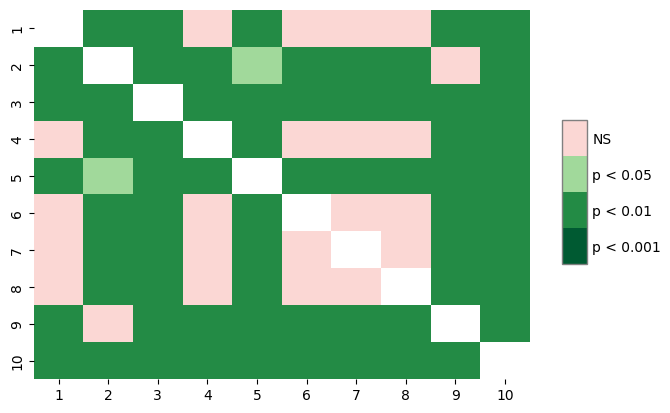

In [70]:
sp.sign_plot(multiple_test)

During t2 period, ...

In [71]:
t2_movies_with_year[concerns].mean().sort_values(ascending=False)

relationships_concern        0.008380
conflict_concern             0.001820
space_concern                0.001163
health_concern               0.000920
mental_concern               0.000683
homophobia_concern           0.000336
ecological_concern           0.000323
gender_inequality_concern    0.000289
technological_concern        0.000215
racism_concern               0.000122
dtype: float64

#### 5.2.2.4 During t3

In [72]:
corr_concerns=t3_movies_with_year[concerns].corr(method='pearson')
corr_concerns.style.background_gradient(cmap='coolwarm').set_precision(2)

/var/folders/8x/2ggqc7_j2m57wss0wl9ckm1h0000gn/T/ipykernel_27272/3823535705.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr_concerns.style.background_gradient(cmap='coolwarm').set_precision(2)


In [73]:
# One way ANOVA 

print('OVERALL CONCERNS DURING T3')

print('--------------------------------------------------------------------------------------------------------------')
Anova = f_oneway(t3_movies_with_year['ecological_concern'], t3_movies_with_year['health_concern'], t3_movies_with_year['conflict_concern'],
        t3_movies_with_year['technological_concern'], t3_movies_with_year['space_concern'], t3_movies_with_year['gender_inequality_concern'],
       t3_movies_with_year['homophobia_concern'], t3_movies_with_year['racism_concern'], t3_movies_with_year['mental_concern'], t3_movies_with_year['relationships_concern'])
print("For all concerns, ANOVA results are: {}".format(Anova))


OVERALL CONCERNS DURING T3
--------------------------------------------------------------------------------------------------------------
For all concerns, ANOVA results are: F_onewayResult(statistic=2362.6653791420326, pvalue=0.0)


In [74]:
multiple_test = sp.posthoc_tukey([t3_movies_with_year['ecological_concern'], t3_movies_with_year['health_concern'], t3_movies_with_year['conflict_concern'],
        t3_movies_with_year['technological_concern'], t3_movies_with_year['space_concern'], t3_movies_with_year['gender_inequality_concern'],
       t3_movies_with_year['homophobia_concern'], t3_movies_with_year['racism_concern'], t3_movies_with_year['mental_concern'], t3_movies_with_year['relationships_concern']])
print("Table of adjusted pvalues from multiple comparisons:")
multiple_test     

Table of adjusted pvalues from multiple comparisons:


1         2      3         4         5         6         7   \
1   1.000000  0.001000  0.001  0.686558  0.001000  0.554899  0.900000   
2   0.001000  1.000000  0.001  0.001000  0.332771  0.001000  0.001000   
3   0.001000  0.001000  1.000  0.001000  0.001000  0.001000  0.001000   
4   0.686558  0.001000  0.001  1.000000  0.001000  0.900000  0.874002   
5   0.001000  0.332771  0.001  0.001000  1.000000  0.001000  0.001000   
6   0.554899  0.001000  0.001  0.900000  0.001000  1.000000  0.742342   
7   0.900000  0.001000  0.001  0.874002  0.001000  0.742342  1.000000   
8   0.124165  0.001000  0.001  0.900000  0.001000  0.900000  0.250225   
9   0.007089  0.001000  0.001  0.001000  0.045623  0.001000  0.002133   
10  0.001000  0.001000  0.001  0.001000  0.001000  0.001000  0.001000   

          8         9      10  
1   0.124165  0.007089  0.001  
2   0.001000  0.001000  0.001  
3   0.001000  0.001000  0.001  
4   0.900000  0.001000  0.001  
5   0.001000  0.045623  0.001  
6   0.900000  0.001000  0.001  
7   0.250225  0.002133  0.001  
8   1.000000  0.001000  0.001  
9   0.001000  1.000000  0.001  
10  0.001000  0.001000  1.000

(<AxesSubplot: >, <matplotlib.colorbar.Colorbar at 0x7fbb254ca4c0>)

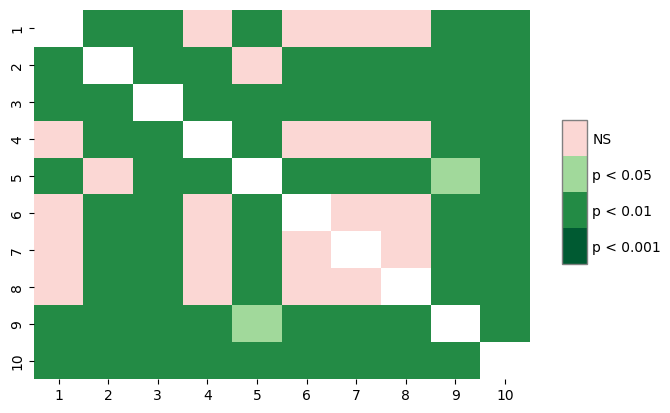

In [75]:
sp.sign_plot(multiple_test)

During t3 period, ...

In [76]:
t3_movies_with_year[concerns].mean().sort_values(ascending=False)

relationships_concern        0.008829
conflict_concern             0.001809
health_concern               0.001086
space_concern                0.000903
mental_concern               0.000658
ecological_concern           0.000370
homophobia_concern           0.000347
technological_concern        0.000229
gender_inequality_concern    0.000213
racism_concern               0.000152
dtype: float64

## 5.3 Sentiments and topics

In [77]:
print("SENTIMENTS AND TOPICS")
for sentiment in sentiments:
    print('--------------------------------------------------------------------------------------------------------------')
    grps = [d['{}'.format(sentiment)] for _, d in movies.groupby('BERT')]
    Anova = f_oneway(*grps)
    print("For {}, ANOVA results are: {}".format(sentiment,Anova))

SENTIMENTS AND TOPICS
--------------------------------------------------------------------------------------------------------------
For positive_score, ANOVA results are: F_onewayResult(statistic=17.658574351526678, pvalue=5.688273424724948e-151)
--------------------------------------------------------------------------------------------------------------
For negative_score, ANOVA results are: F_onewayResult(statistic=24.759963030803927, pvalue=9.456849274883036e-223)
--------------------------------------------------------------------------------------------------------------
For neutral_score, ANOVA results are: F_onewayResult(statistic=14.004597384438672, pvalue=2.1396103474609884e-114)
--------------------------------------------------------------------------------------------------------------
For multi_fear, ANOVA results are: F_onewayResult(statistic=30.436566342397665, pvalue=2.385991203230317e-280)
------------------------------------------------------------------------------

In [78]:
for sentiment in sentiments:
    print('-----------------------------------Multiple comparisons------------------------------------------------------------')
    grps = [d['{}'.format(sentiment)] for _, d in movies.groupby('BERT')]
    names =[n for n, d in movies.groupby('BERT')]
    multiple_test = sp.posthoc_tukey([*grps])
    print('Multiple comparisons for {}, the topics comparisons with significative differences in {} are:'.format(sentiment,sentiment))
    sig = list(zip(list(np.where(multiple_test < 0.05)[0]),list(np.where(multiple_test < 0.05)[1])))
    sig_sorted = sorted(set(tuple(sorted(t)) for t in sig), key=lambda x: x[0])
    #sig_sorted = sorted(set(tuple(sorted(t)) for t in sig_sorted), key=lambda x: x[0])
    print(sig_sorted, end='')
    print('\n')

-----------------------------------Multiple comparisons------------------------------------------------------------
Multiple comparisons for positive_score, the topics comparisons with significative differences in positive_score are:
[(0, 5), (0, 23), (0, 18), (0, 36), (0, 31), (0, 8), (0, 3), (0, 12), (0, 16), (0, 2), (0, 44), (0, 25), (0, 34), (0, 20), (0, 29), (0, 6), (0, 15), (0, 24), (0, 42), (0, 1), (0, 10), (1, 15), (1, 24), (1, 42), (1, 10), (1, 19), (1, 5), (1, 23), (1, 18), (1, 50), (1, 36), (1, 31), (1, 8), (1, 35), (1, 44), (1, 3), (1, 12), (1, 30), (1, 7), (1, 25), (1, 2), (1, 20), (1, 6), (2, 27), (2, 45), (2, 13), (2, 22), (2, 40), (2, 8), (2, 17), (2, 3), (2, 21), (2, 7), (2, 16), (2, 11), (2, 34), (2, 43), (2, 29), (2, 38), (2, 47), (2, 6), (2, 14), (2, 23), (2, 9), (2, 4), (3, 23), (3, 18), (3, 27), (3, 36), (3, 45), (3, 13), (3, 40), (3, 21), (3, 16), (3, 34), (3, 29), (4, 44), (4, 29), (4, 5), (4, 42), (4, 23), (4, 18), (4, 36), (4, 31), (5, 27), (5, 36), (5, 45), (

In [16]:
def bootstrap_CI_diff(data1, data2, confidence_level=0.05, nbr_draws=10000):
    means1 = np.zeros(nbr_draws)
    means2 = np.zeros(nbr_draws)
    data1 = np.array(data1)
    data2 = np.array(data2)
    means_diff = np.zeros(nbr_draws)

    for n in range(nbr_draws):
        indices1 = np.random.randint(0, len(data1), len(data1))
        data_tmp1 = data1[indices1] 
        means1[n] = np.nanmean(data_tmp1)
        indices2 = np.random.randint(0, len(data2), len(data2))
        data_tmp2 = data2[indices2] 
        means2[n] = np.nanmean(data_tmp2)
        means_diff[n]=means1[n]-means2[n]
    
    confidence_level=confidence_level*100
    lower=confidence_level/2
    upper=100-confidence_level/2
    return [np.nanpercentile(means_diff, lower), np.mean(means_diff), np.nanpercentile(means_diff, upper)]

In [27]:
def bootstrap_multiple_comparison_CI(samples_list,names_list, n_draws=10000):
    CIs={}
    
    for id1 in range(0,len(samples_list)):
        for id2 in range(0,len(samples_list)):
            if(id1 < id2):
                CIs['{}_{}'.format(names_list[id1],names_list[id2])] = bootstrap_CI_diff(samples_list[id1], samples_list[id2], 0.05*2/(len(samples_list)*(len(samples_list)-1)), n_draws) 
    #print(CIs)
    return(CIs)

In [1]:
def plot_CIs_from_dict(d, title):

    keys=list(d.keys())
    yerrormin=[]
    yerrormax=[]
    means=[]
    for key in keys:
        lower = d['{}'.format(key)][0]
        mean = d['{}'.format(key)][1]
        upper = d['{}'.format(key)][2]
        means.append(mean)
        yerrormin.append(mean-lower)
        yerrormax.append(upper-mean)
    
    fig, ax = plt.subplots(figsize=(20,6))
    ax.plot(keys, means,'.')

    ax.errorbar(x=keys, y=means, yerr=[yerrormin,yerrormax], fmt=' ')
    plt.axhline(y=0,color='red',linestyle='--')
    plt.setp(ax.get_xticklabels(), rotation='vertical', fontsize=7)
    plt.title(title)
    

    plt.show()

In [ ]:
for sentiment in sentiments:
    print('-----------------------------------Multiple comparisons------------------------------------------------------------')
    grps = [d['{}'.format(sentiment)] for _, d in movies.groupby('BERT')]
    names =[n for n, d in movies.groupby('BERT')]
    multiple_test = sp.posthoc_tukey([*grps])
    print('Multiple comparisons for {}'.format(sentiment))
    plot_CIs_from_dict(bootstrap_multiple_comparison_CI([*grps],names),title='Bootstrap CI adjusted for multiple comparisons of {} across topics.'.format(sentiment))

## 5.4 Sentiments and concerns

In [111]:
print('Pearson correlation coefficients')
for sentiment in sentiments:
    for concern in concerns:
        print('{} -- {}:  {}'.format(sentiment, concern, (movies[['{}'.format(sentiment),'{}'.format(concern)]].corr(method="pearson")['{}'.format(sentiment)]['{}'.format(concern)]))) 


Pearson correlation coefficients
positive_score -- ecological_concern:  -0.021372766480362723
positive_score -- health_concern:  -0.011443229172210162
positive_score -- conflict_concern:  -0.04744070662151128
positive_score -- technological_concern:  -0.005274553115436007
positive_score -- space_concern:  -0.030021173417241243
positive_score -- gender_inequality_concern:  -0.03375853256796535
positive_score -- homophobia_concern:  0.004002247805578775
positive_score -- racism_concern:  -0.019981915877212948
positive_score -- mental_concern:  0.00013366352095868066
positive_score -- relationships_concern:  0.08146410347449488
negative_score -- ecological_concern:  -0.014037066086861798
negative_score -- health_concern:  0.03170253546509983
negative_score -- conflict_concern:  0.09437692751626782
negative_score -- technological_concern:  -0.011974387130877675
negative_score -- space_concern:  -0.007764688249122932
negative_score -- gender_inequality_concern:  0.09547771239911954
negative